# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
df = pd.read_excel('Student_data.xlsx')



In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1004
reading score                  1004
writing score                  1004
dtype: int64

>Since there are just 4 rows with missing data we will be dropping them.

In [5]:
df = df.dropna()

In [6]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


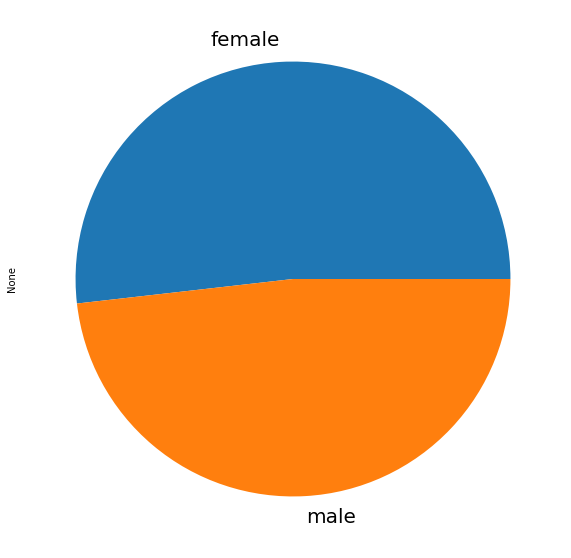

In [8]:
df.groupby('gender').size().plot(kind='pie', figsize = (10,10), fontsize=20)

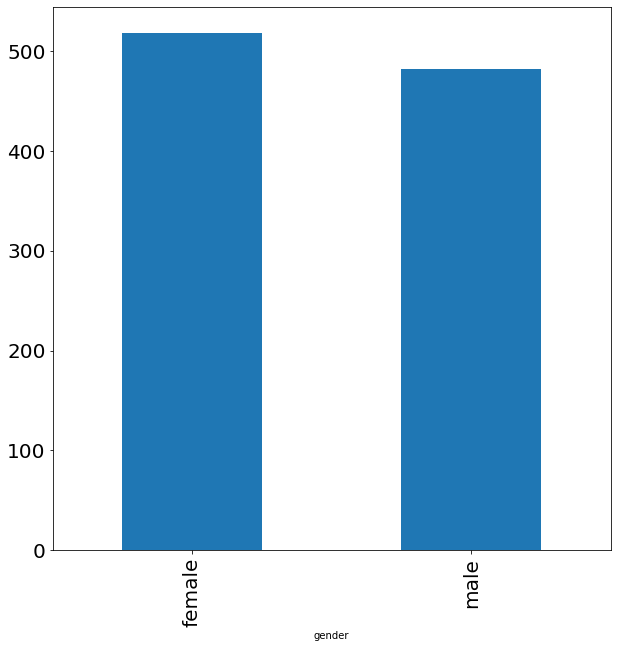

In [9]:
df.groupby('gender').size().plot(kind='bar', figsize = (10,10), fontsize=20)

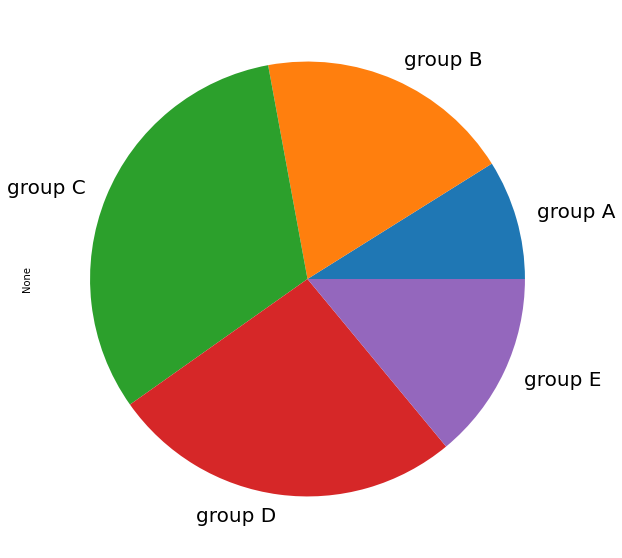

In [10]:
df.groupby('race/ethnicity').size().plot(kind='pie', figsize = (10,10), fontsize=20)

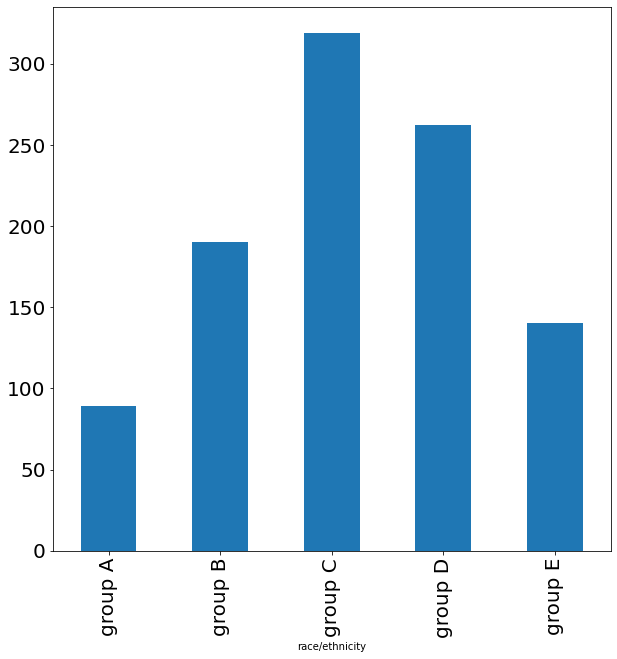

In [11]:
df.groupby('race/ethnicity').size().plot(kind='bar', figsize = (10,10), fontsize=20)

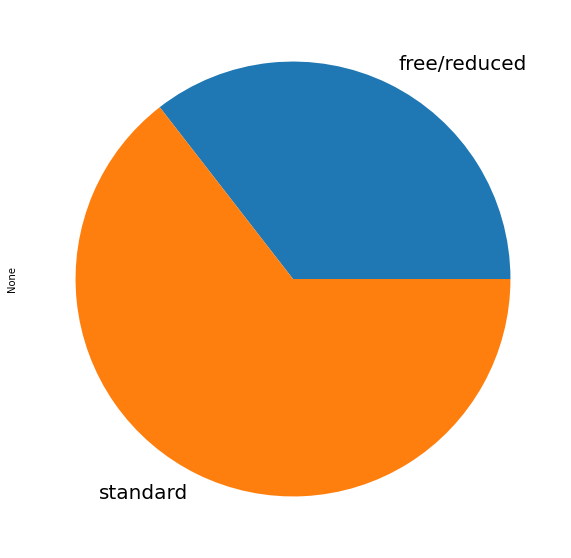

In [12]:
df.groupby('lunch').size().plot(kind='pie', figsize = (10,10), fontsize=20)

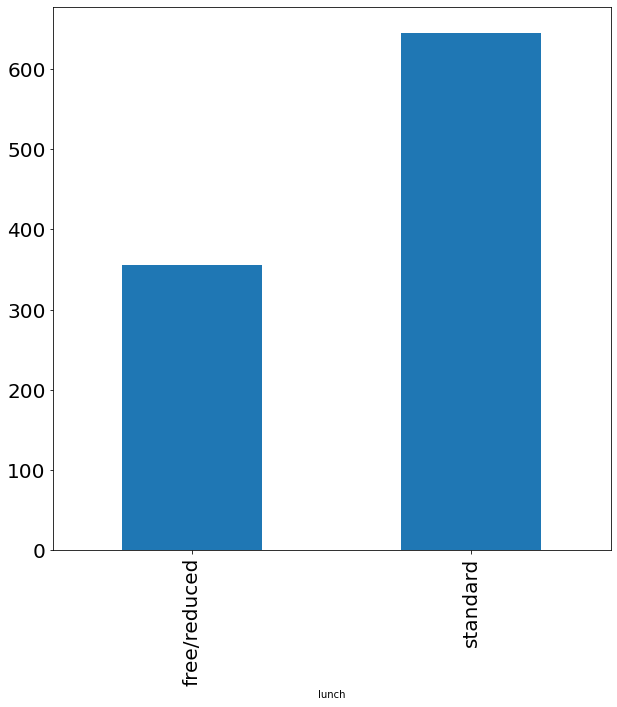

In [13]:
df.groupby('lunch').size().plot(kind='bar', figsize = (10,10), fontsize=20)

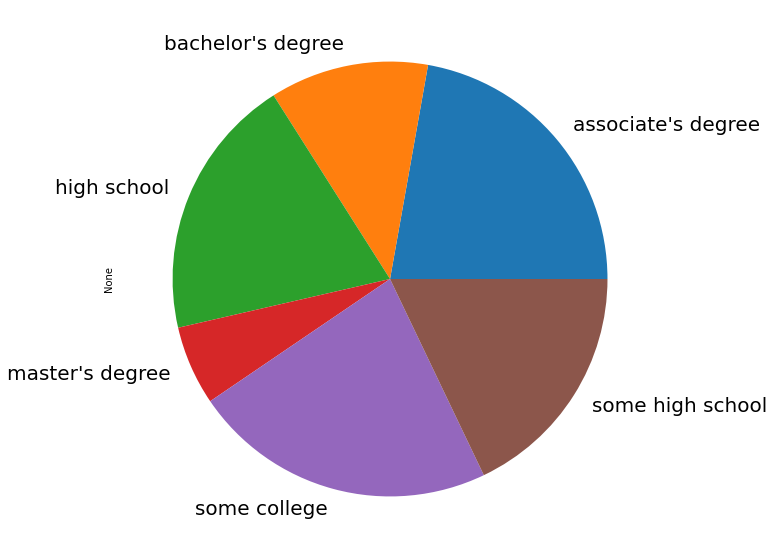

In [14]:
df.groupby('parental level of education').size().plot(kind='pie', figsize = (10,10), fontsize=20)

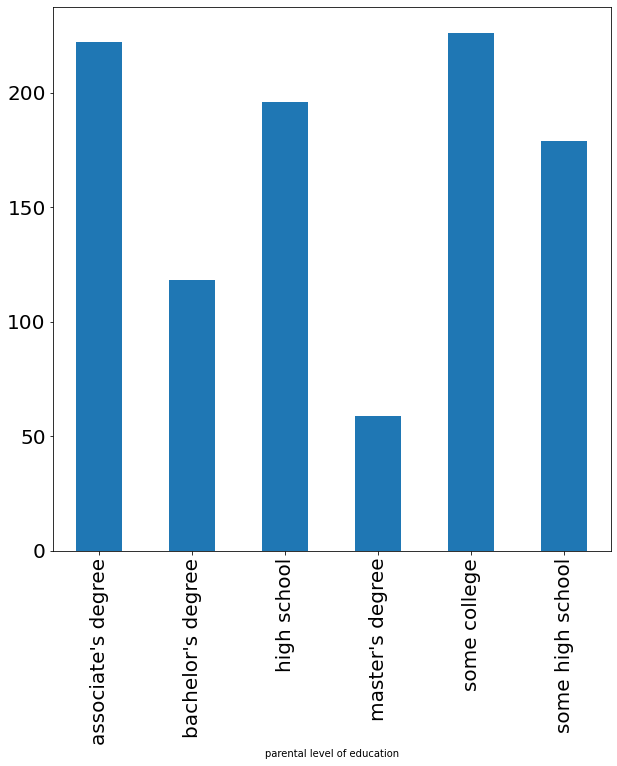

In [15]:
df.groupby('parental level of education').size().plot(kind='bar', figsize = (10,10), fontsize=20)

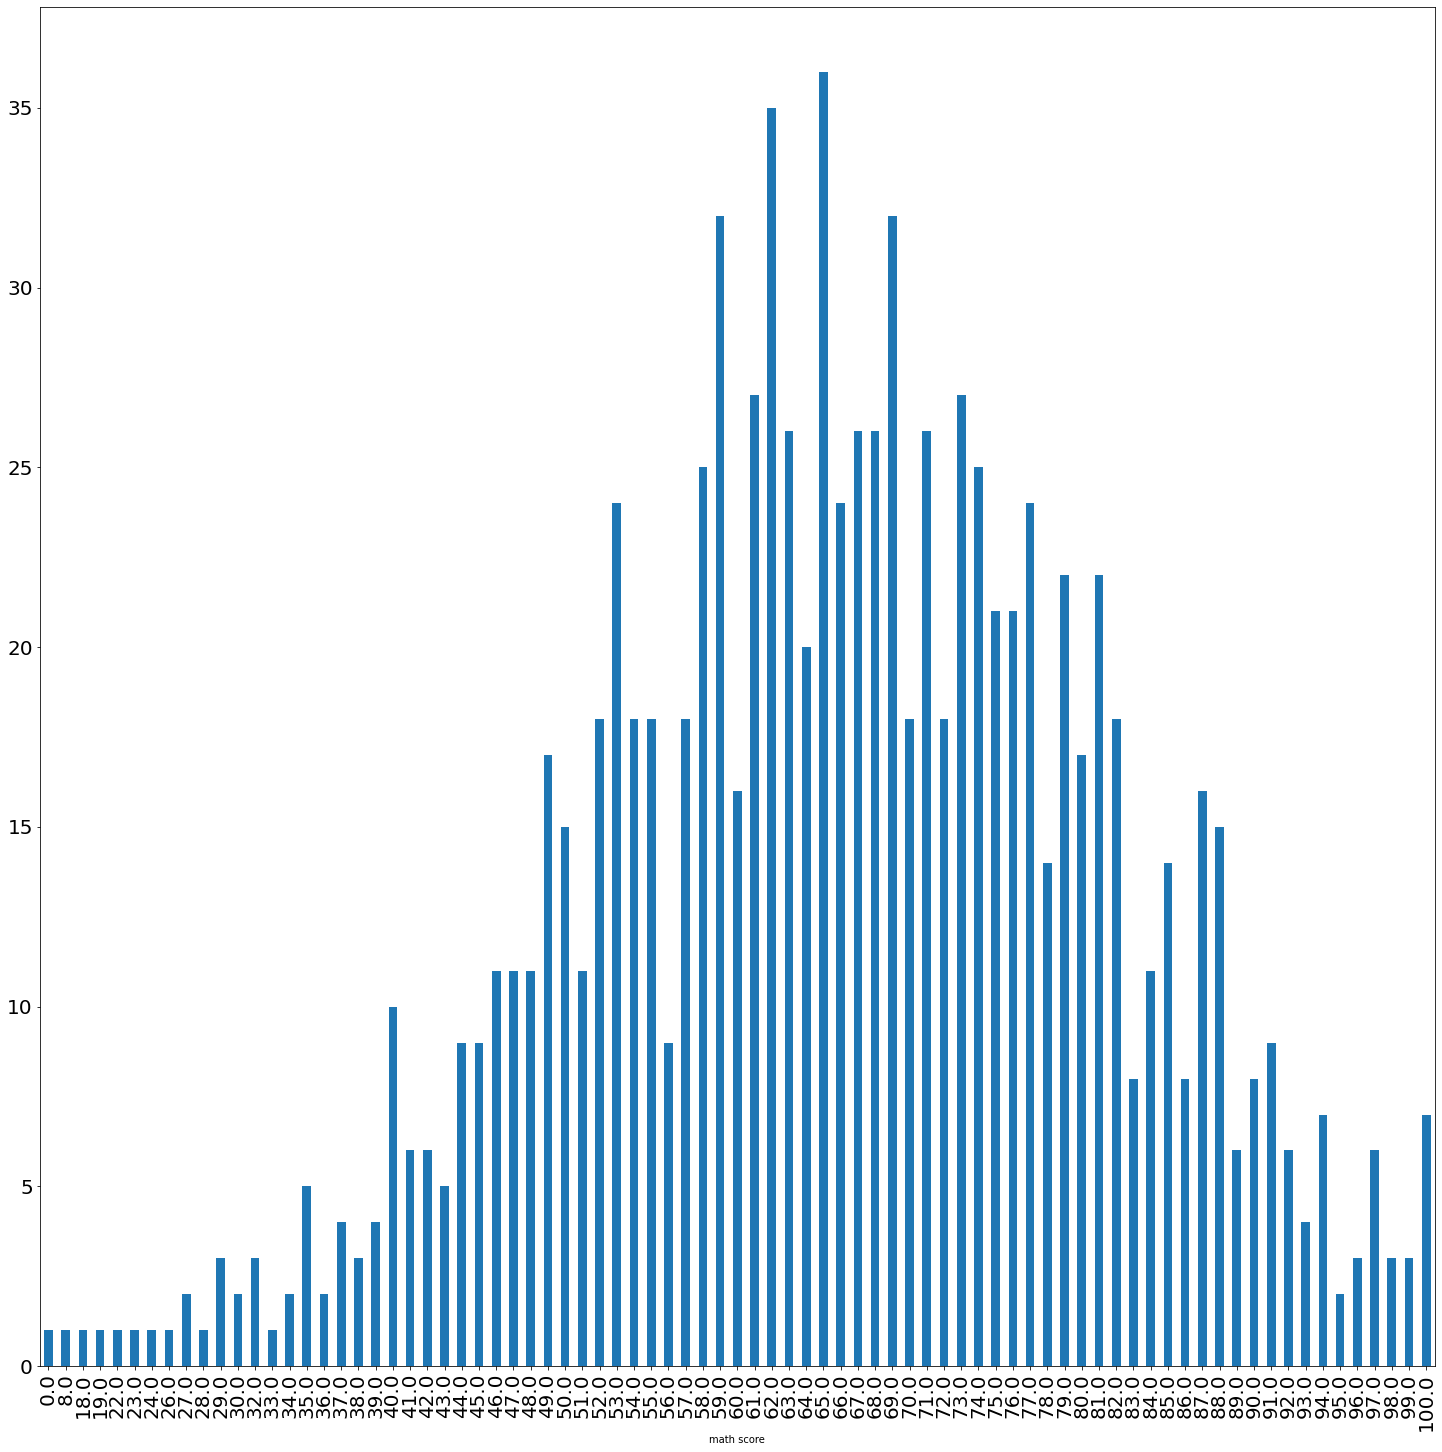

In [16]:
df.groupby('math score').size().plot(kind='bar', figsize = (25,25), fontsize=20)

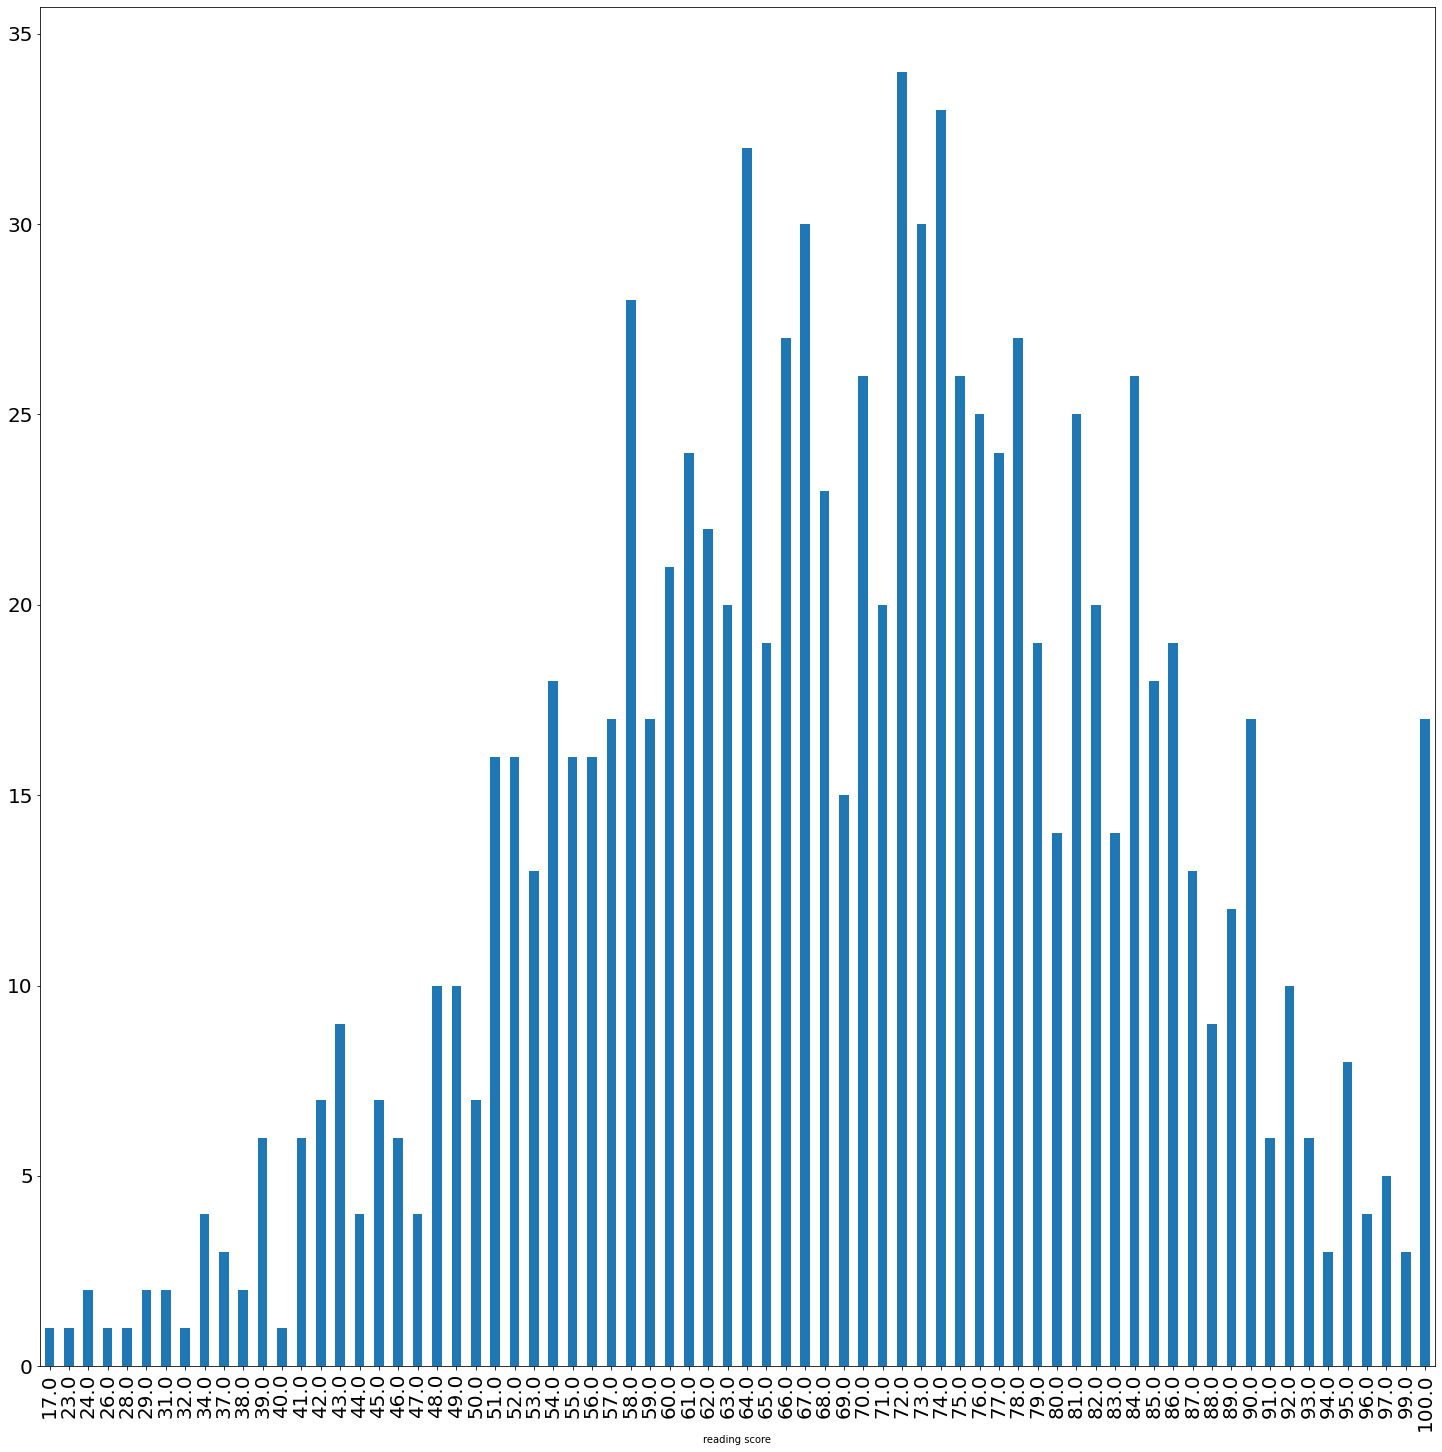

In [17]:
df.groupby('reading score').size().plot(kind='bar', figsize = (25,25), fontsize=20)

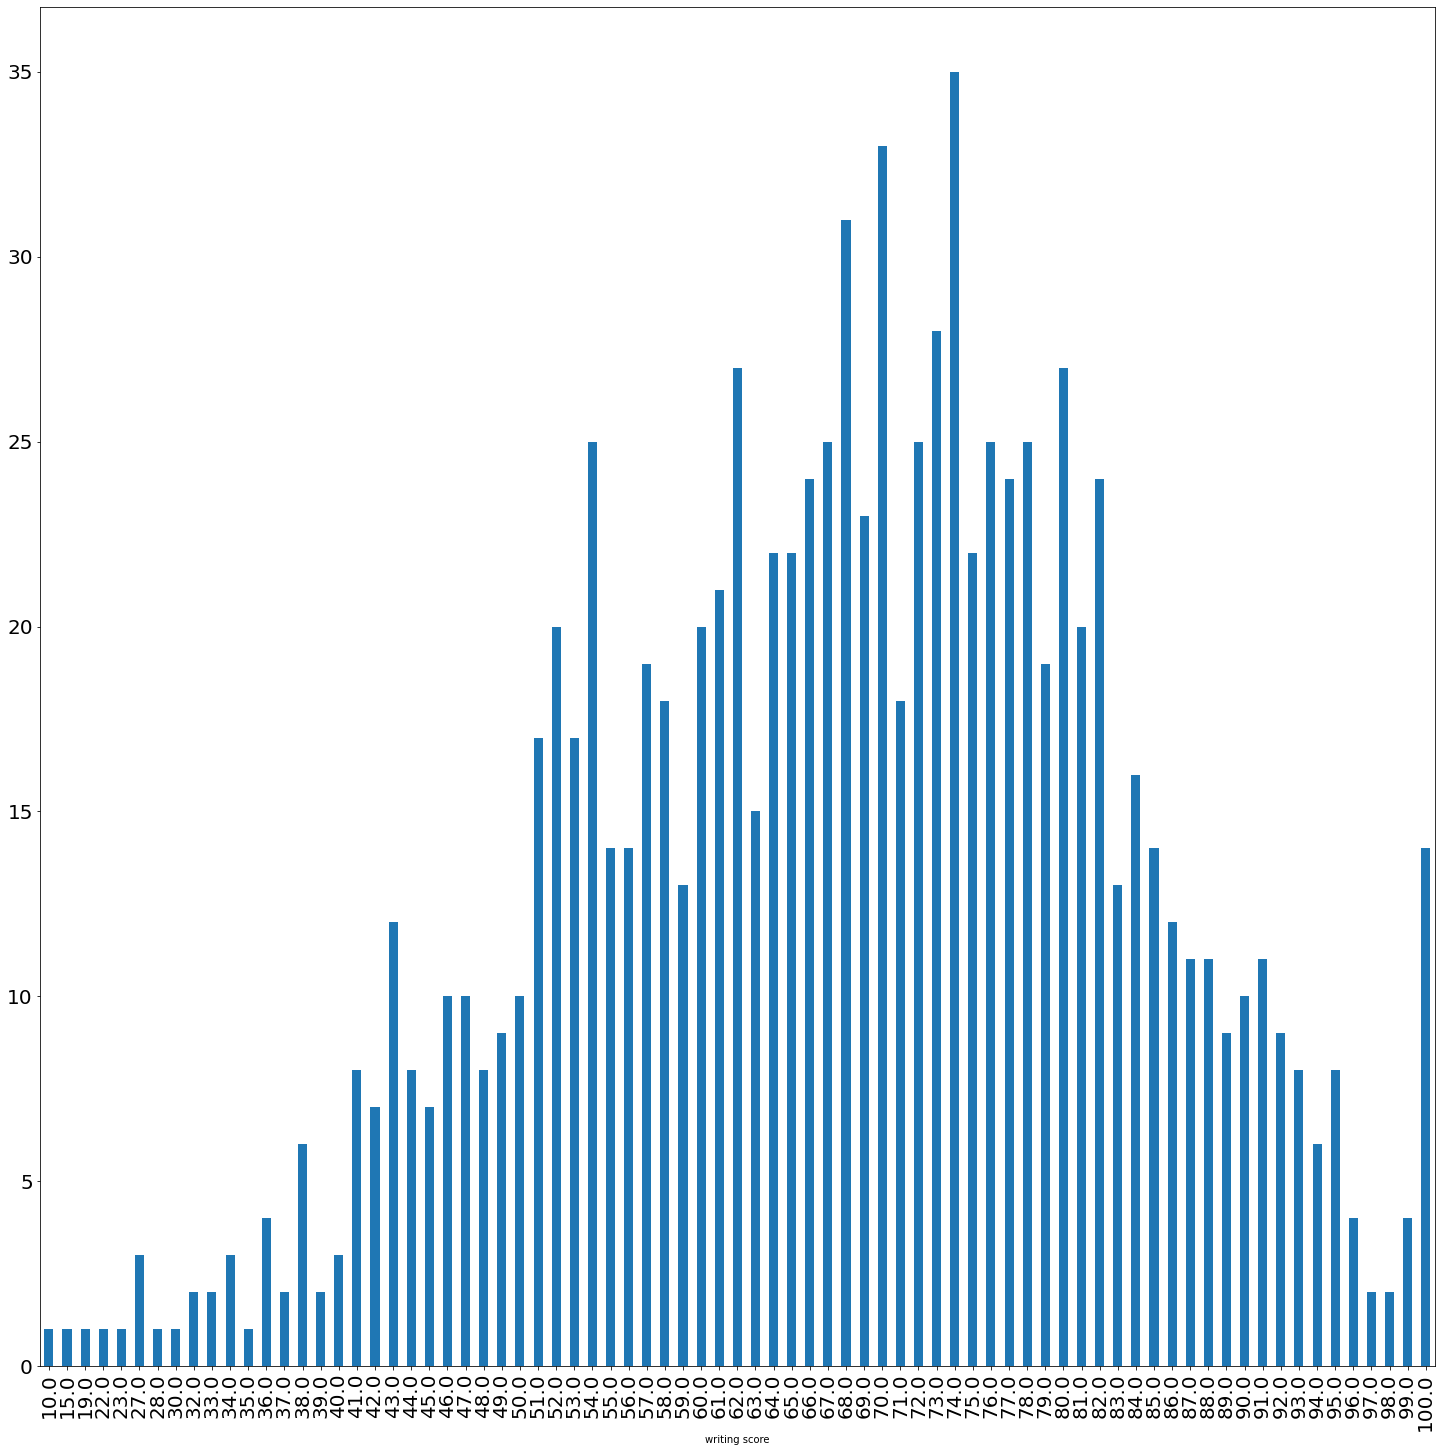

In [18]:
df.groupby('writing score').size().plot(kind='bar', figsize = (25,25), fontsize=20)

In [19]:
df["mean_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

>convert mean scores into a band

In [20]:
_min = df["mean_score"].min()
_max = df["mean_score"].max()
print(f"minimum average score is {_min}, maximum average score is {_max}")

minimum average score is 9.0, maximum average score is 100.0


In [21]:
#divide average score into 7 bands and visualize
df['mean_score_band'] = pd.qcut(df['mean_score'], 7, labels = False)
pd.qcut(df['mean_score'], q=7)

0      (71.0, 76.333]
1      (76.333, 83.0]
2       (83.0, 100.0]
3       (8.999, 52.0]
4      (71.0, 76.333]
            ...      
995     (83.0, 100.0]
996      (52.0, 60.0]
997      (60.0, 66.0]
998    (71.0, 76.333]
999    (76.333, 83.0]
Name: mean_score, Length: 1000, dtype: category
Categories (7, interval[float64]): [(8.999, 52.0] < (52.0, 60.0] < (60.0, 66.0] < (66.0, 71.0] < (71.0, 76.333] < (76.333, 83.0] < (83.0, 100.0]]

In [22]:
df["mean_score_band"]

0      4
1      5
2      6
3      0
4      4
      ..
995    6
996    1
997    2
998    4
999    5
Name: mean_score_band, Length: 1000, dtype: int64

>convert math scores into a band

In [23]:
#divide average score into 7 bands and visualize
df['math score_band'] = pd.qcut(df['math score'], 7, labels = False)
pd.qcut(df['math score'], q=7)

0        (69.0, 75.0]
1        (64.0, 69.0]
2       (82.0, 100.0]
3      (-0.001, 50.0]
4        (75.0, 82.0]
            ...      
995     (82.0, 100.0]
996      (58.0, 64.0]
997      (58.0, 64.0]
998      (64.0, 69.0]
999      (75.0, 82.0]
Name: math score, Length: 1000, dtype: category
Categories (7, interval[float64]): [(-0.001, 50.0] < (50.0, 58.0] < (58.0, 64.0] < (64.0, 69.0] < (69.0, 75.0] < (75.0, 82.0] < (82.0, 100.0]]

>convert reading score into a band

In [24]:
#divide reading score into 7 bands and visualize
df['reading score_band'] = pd.qcut(df['reading score'], 7, labels = False)
pd.qcut(df['reading score'], q=7)

0       (67.0, 73.0]
1      (85.0, 100.0]
2      (85.0, 100.0]
3       (54.0, 61.0]
4       (73.0, 78.0]
           ...      
995    (85.0, 100.0]
996     (54.0, 61.0]
997     (67.0, 73.0]
998     (73.0, 78.0]
999    (85.0, 100.0]
Name: reading score, Length: 1000, dtype: category
Categories (7, interval[float64]): [(16.999, 54.0] < (54.0, 61.0] < (61.0, 67.0] < (67.0, 73.0] < (73.0, 78.0] < (78.0, 85.0] < (85.0, 100.0]]

>convert writing score into a band

In [25]:
#divide reading score into 7 bands and visualize
df['writing score_band'] = pd.qcut(df['writing score'], 7, labels = False)
pd.qcut(df['writing score'], q=7)

0       (72.0, 77.0]
1      (84.0, 100.0]
2      (84.0, 100.0]
3      (9.999, 52.0]
4       (72.0, 77.0]
           ...      
995    (84.0, 100.0]
996     (52.0, 60.0]
997     (60.0, 66.0]
998     (72.0, 77.0]
999    (84.0, 100.0]
Name: writing score, Length: 1000, dtype: category
Categories (7, interval[float64]): [(9.999, 52.0] < (52.0, 60.0] < (60.0, 66.0] < (66.0, 72.0] < (72.0, 77.0] < (77.0, 84.0] < (84.0, 100.0]]

# Plot of Gender and Each Test Score

In [26]:
df.groupby(['gender', 'math score_band'])['math score_band'].count()

gender  math score_band
female  0                  97
        1                  79
        2                  81
        3                  83
        4                  66
        5                  61
        6                  51
male    0                  53
        1                  62
        2                  75
        3                  61
        4                  69
        5                  77
        6                  85
Name: math score_band, dtype: int64

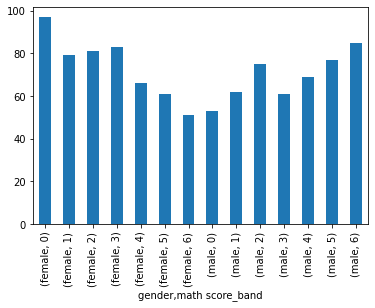

In [27]:
groups = df.groupby(['gender','math score_band']).size()
groups.plot.bar()

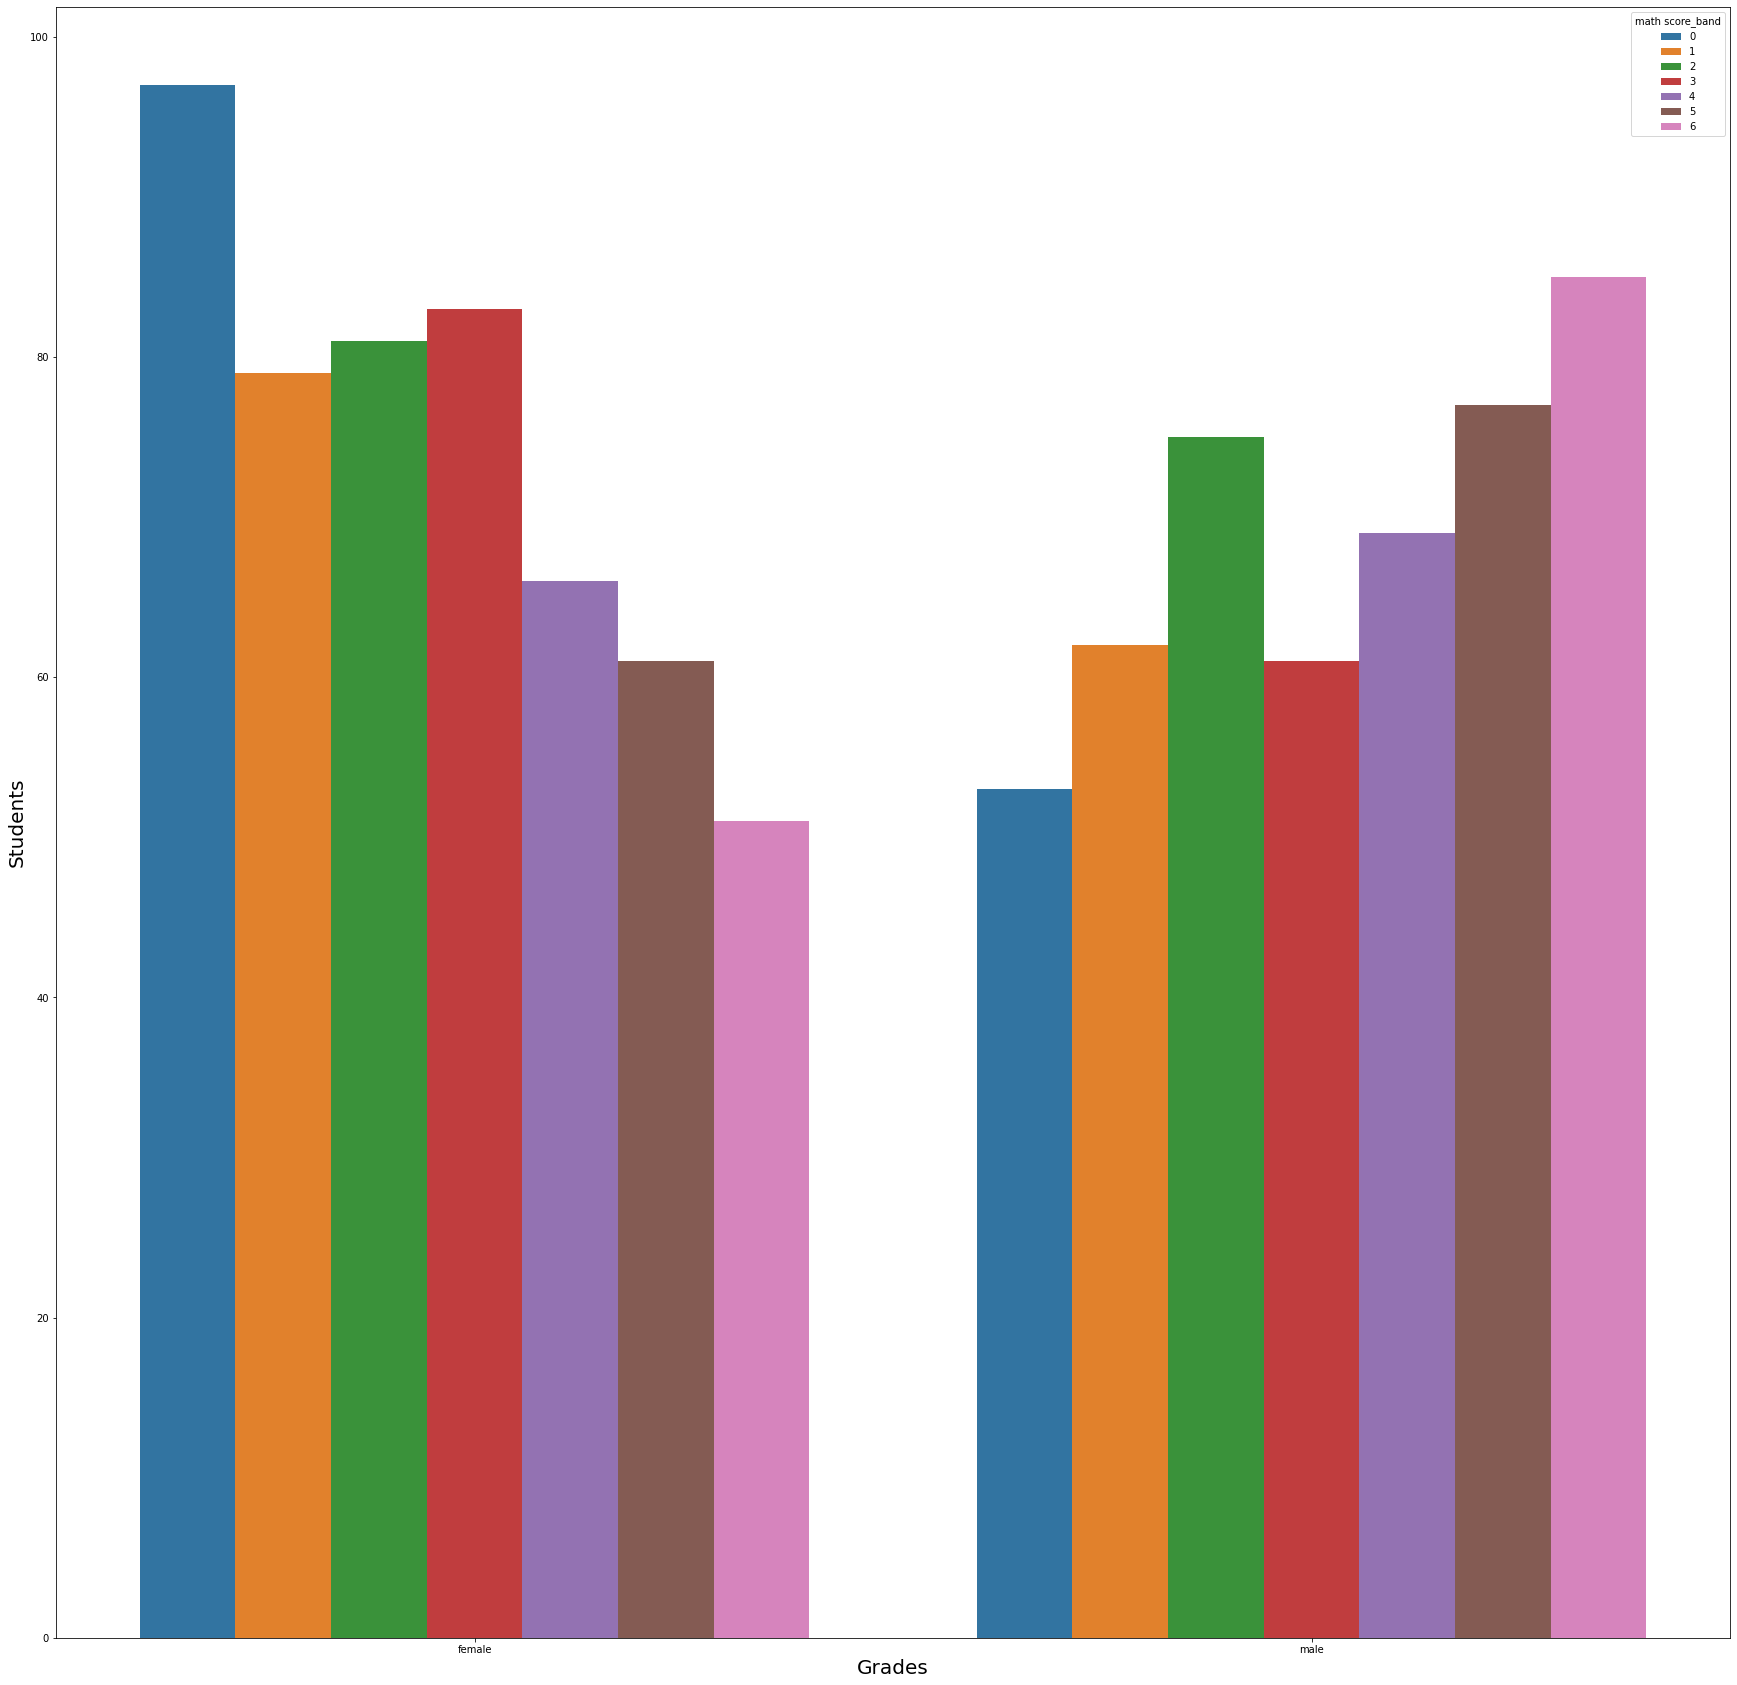

In [28]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['gender'],hue='math score_band',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

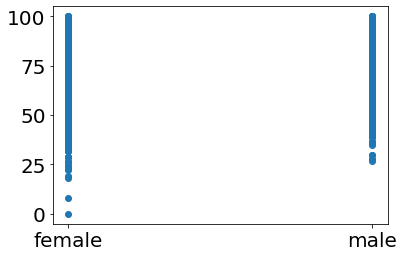

In [29]:
f = plt.figure()
s = plt.scatter(df['gender'], df['math score'])

In [30]:
df.groupby(['gender', 'reading score_band'])['reading score_band'].count()

gender  reading score_band
female  0                      53
        1                      56
        2                      73
        3                      82
        4                      74
        5                      78
        6                     102
male    0                     107
        1                      83
        2                      77
        3                      66
        4                      61
        5                      58
        6                      30
Name: reading score_band, dtype: int64

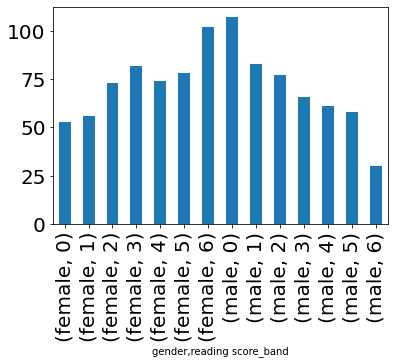

In [31]:
groups = df.groupby(['gender','reading score_band']).size()
groups.plot.bar()

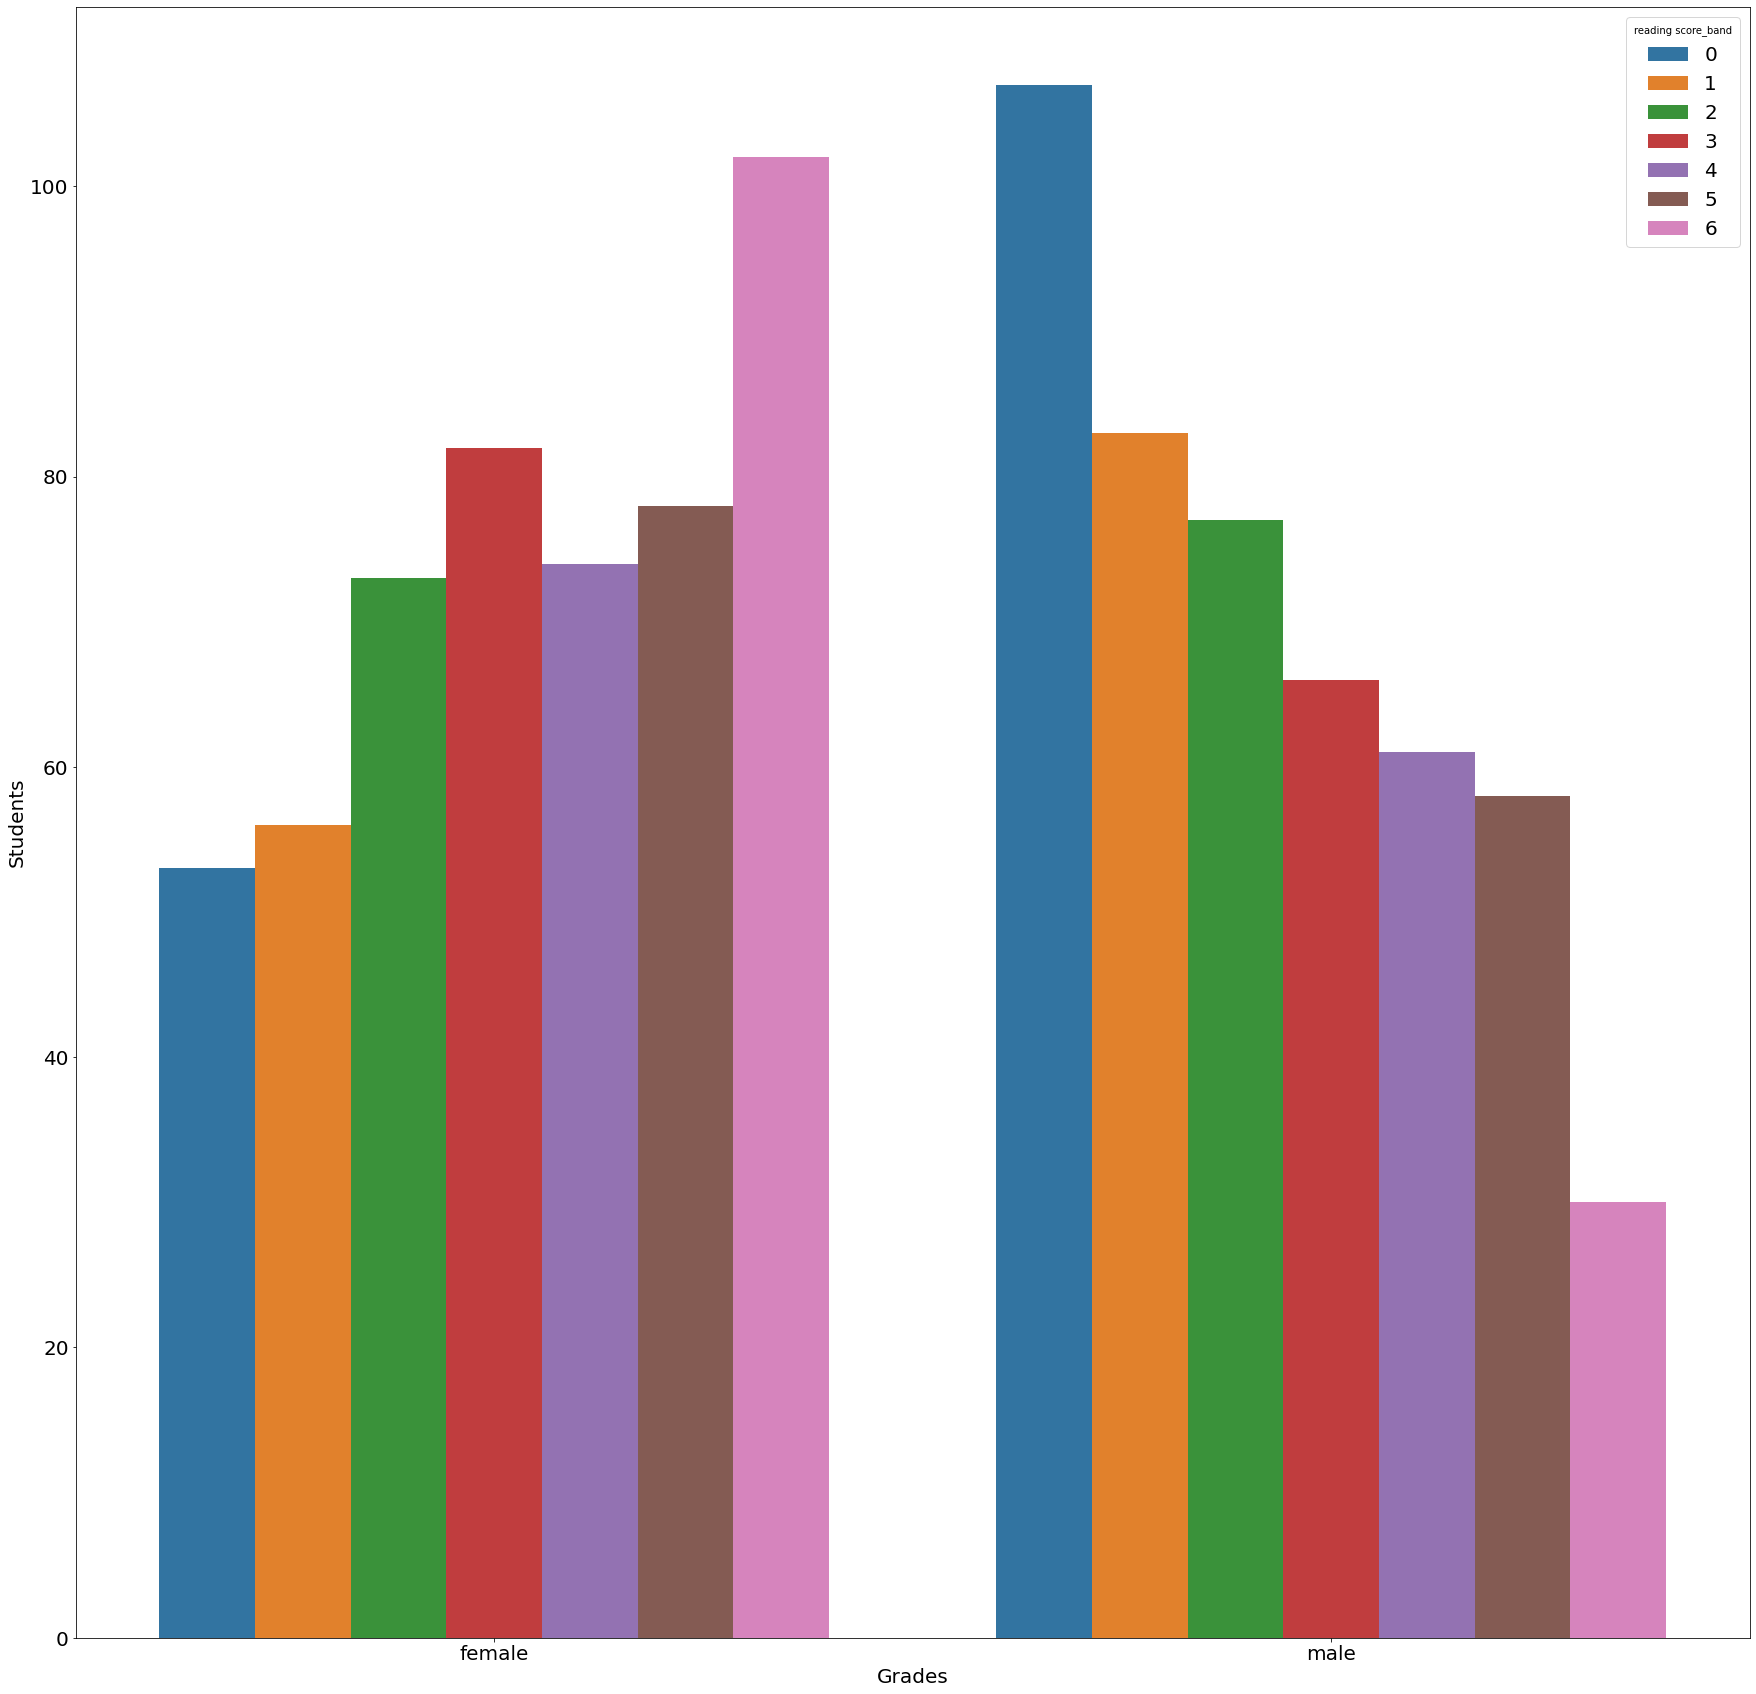

In [32]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['gender'],hue='reading score_band',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

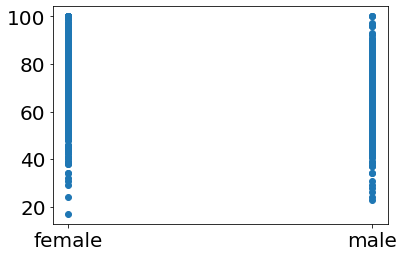

In [33]:
f = plt.figure()
s = plt.scatter(df['gender'], df['reading score'])

In [34]:
df.groupby(['gender', 'writing score_band'])['reading score_band'].count()

gender  writing score_band
female  0                      45
        1                      55
        2                      60
        3                      77
        4                      81
        5                      96
        6                     104
male    0                     116
        1                      85
        2                      71
        3                      78
        4                      53
        5                      48
        6                      31
Name: reading score_band, dtype: int64

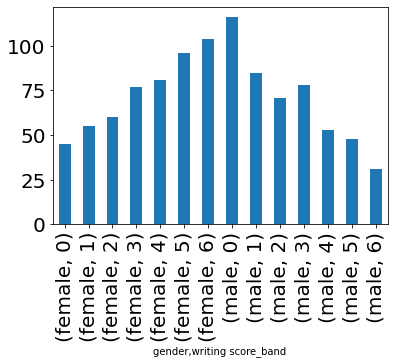

In [35]:
groups = df.groupby(['gender','writing score_band']).size()
groups.plot.bar()

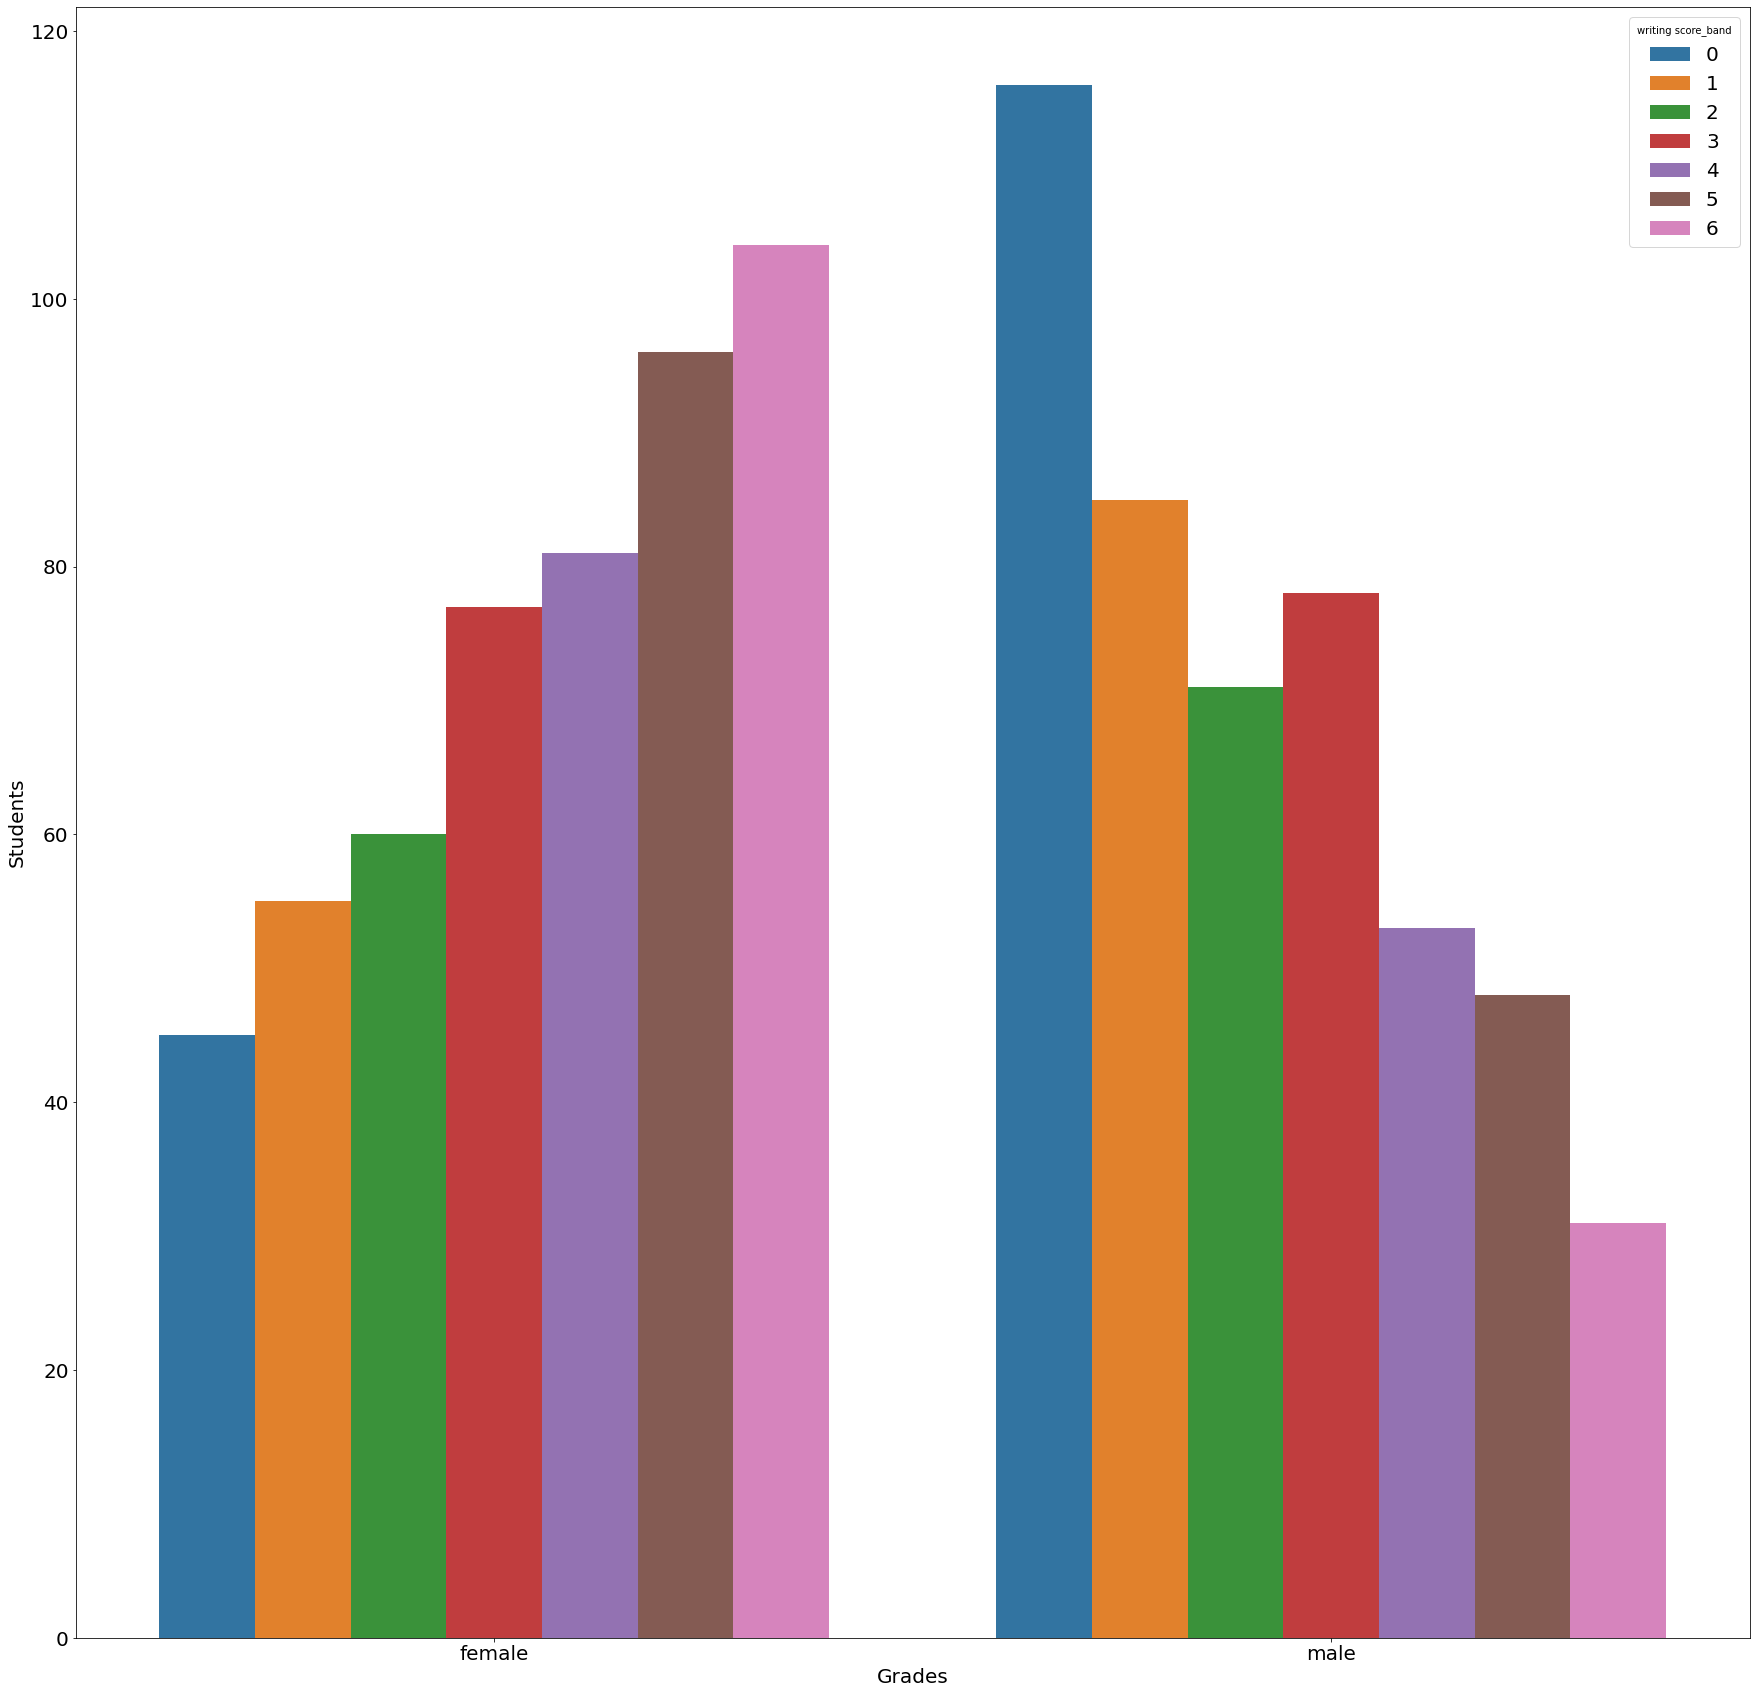

In [36]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['gender'],hue='writing score_band',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

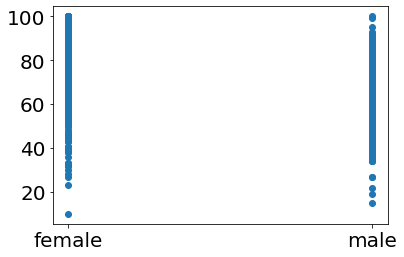

In [37]:
f = plt.figure()
s = plt.scatter(df['gender'], df['writing score'])

In [38]:
df.groupby(['gender', 'mean_score'])['mean_score'].count()

gender  mean_score
female  9.000000      1
        18.333333     1
        26.000000     1
        29.333333     1
        29.666667     2
                     ..
male    93.666667     1
        94.000000     2
        97.666667     1
        98.666667     1
        100.000000    1
Name: mean_score, Length: 326, dtype: int64

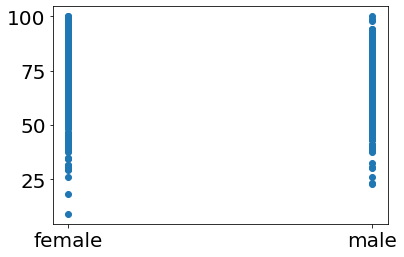

In [39]:
f = plt.figure()
s = plt.scatter(df['gender'], df['mean_score'])

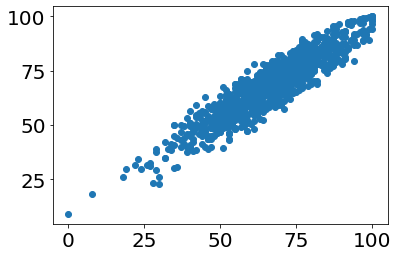

In [40]:
f = plt.figure()
s = plt.scatter(df['math score'], df['mean_score'])

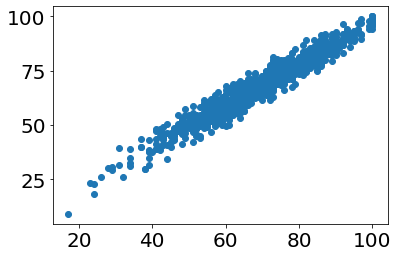

In [41]:
f = plt.figure()
s = plt.scatter(df['reading score'], df['mean_score'])

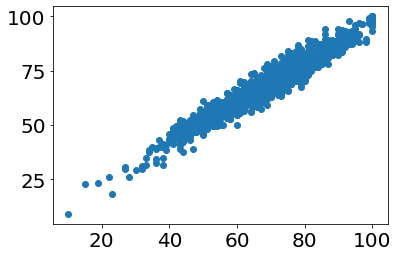

In [42]:
f = plt.figure()
s = plt.scatter(df['writing score'], df['mean_score'])

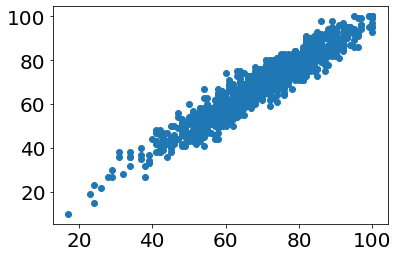

In [43]:
f = plt.figure()
s = plt.scatter(df['reading score'], df['writing score'])

# GROUPING GENDER BY RACE OR ETHINICITY

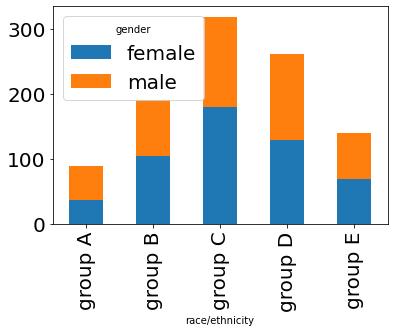

In [44]:
df.groupby(['race/ethnicity','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

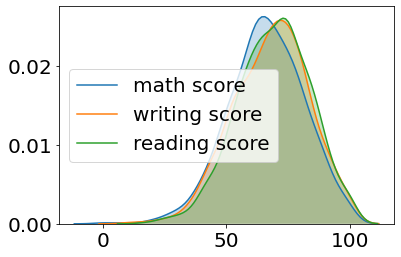

In [45]:
for col in df[['math score', 'writing score', 'reading score']]:
    sns.kdeplot(df[col], shade=True)

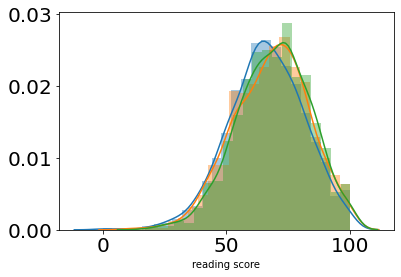

In [46]:
sns.distplot(df['math score'])
sns.distplot(df['writing score'])
sns.distplot(df['reading score'])

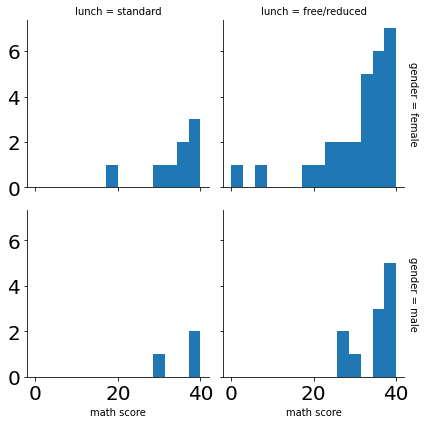

In [47]:
grid = sns.FacetGrid(df, row="gender", col="lunch", margin_titles=True)
grid.map(plt.hist, "math score", bins=np.linspace(0, 40, 15));

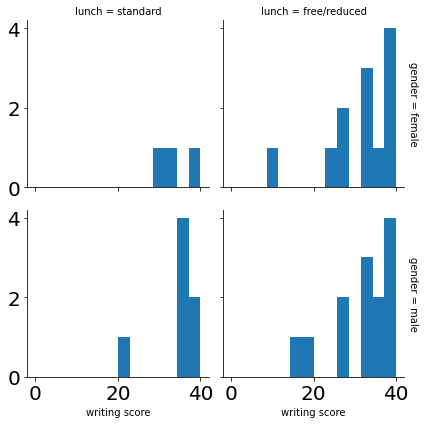

In [48]:
grid = sns.FacetGrid(df, row="gender", col="lunch", margin_titles=True)
grid.map(plt.hist, "writing score", bins=np.linspace(0, 40, 15));

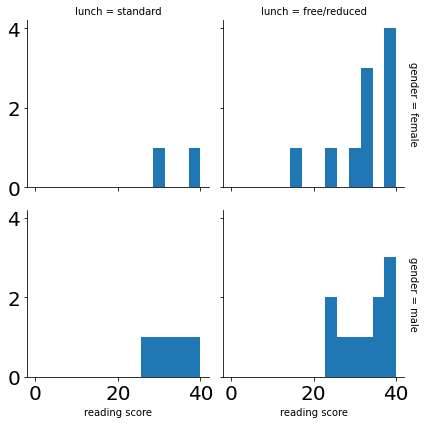

In [49]:
grid = sns.FacetGrid(df, row="gender", col="lunch", margin_titles=True)
grid.map(plt.hist, "reading score", bins=np.linspace(0, 40, 15));

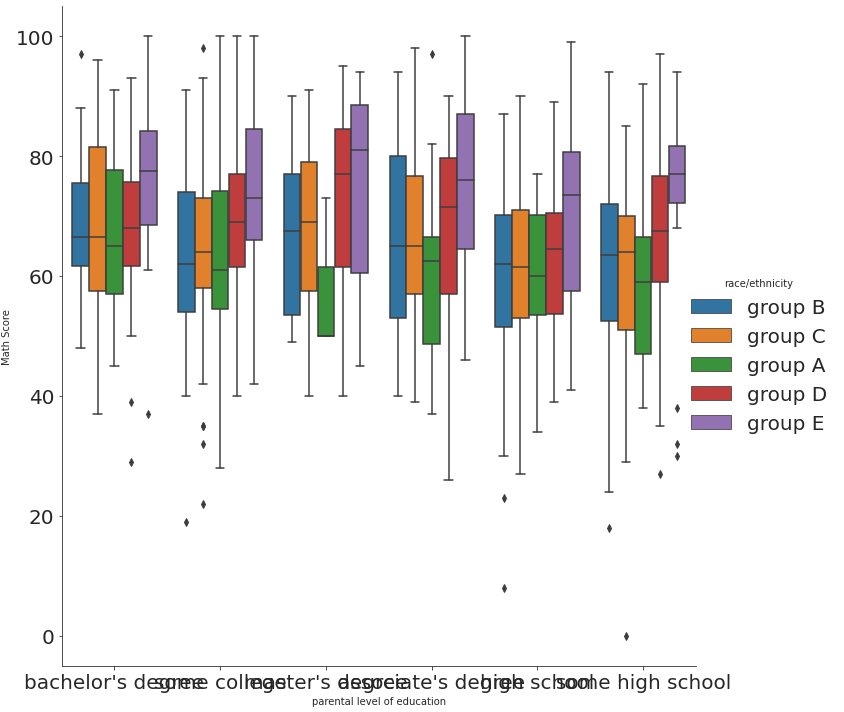

In [50]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("parental level of education", "math score", "race/ethnicity", data=df, kind="box", size=10)
    g.set_axis_labels("parental level of education", "Math Score")

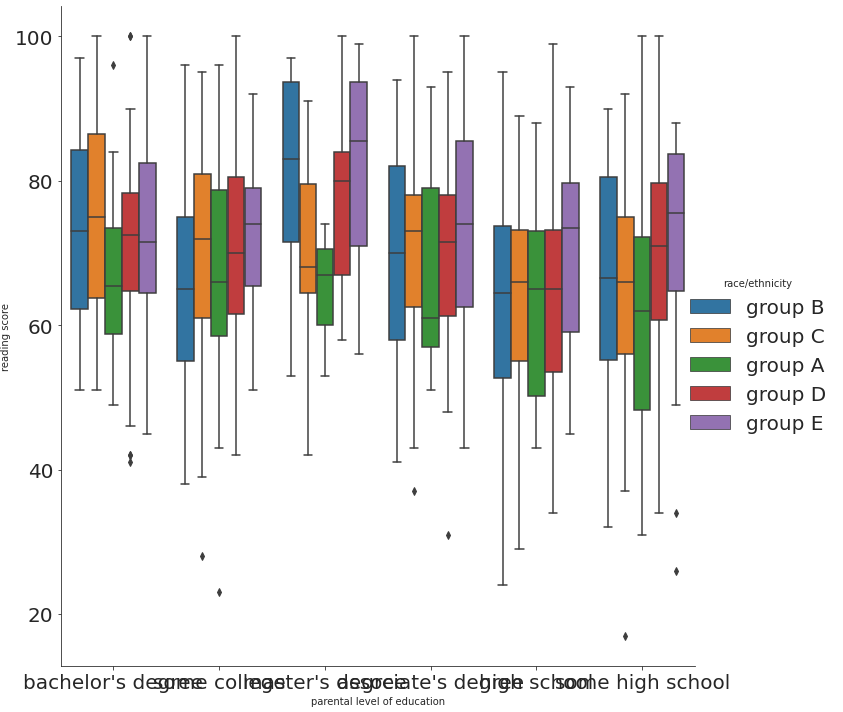

In [51]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("parental level of education", "reading score", "race/ethnicity", data=df, kind="box", size= 10)
    g.set_axis_labels("parental level of education", "reading score");

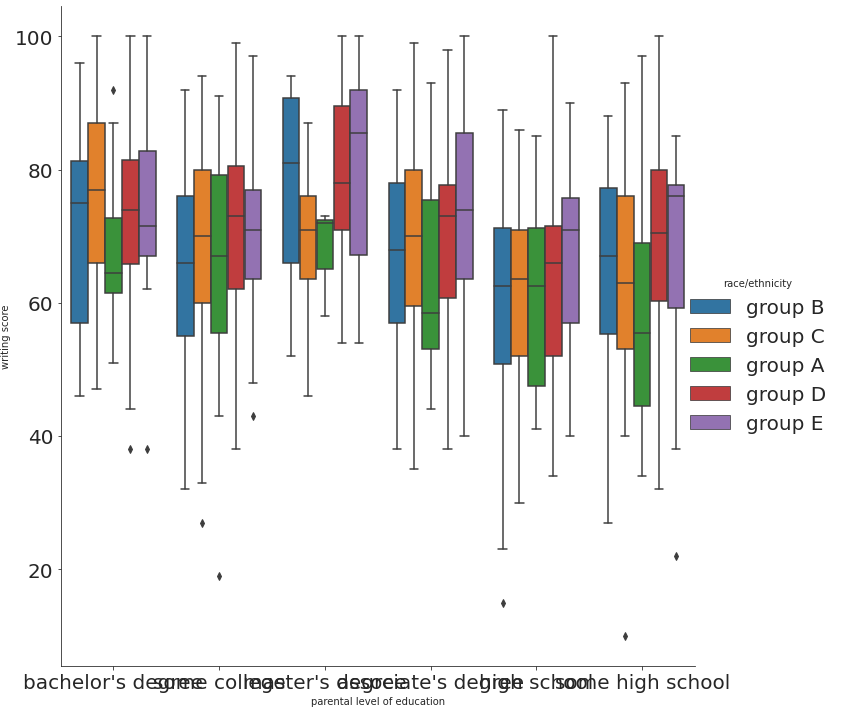

In [52]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("parental level of education", "writing score", "race/ethnicity", data=df, kind="box", size= 10)
    g.set_axis_labels("parental level of education", "writing score");

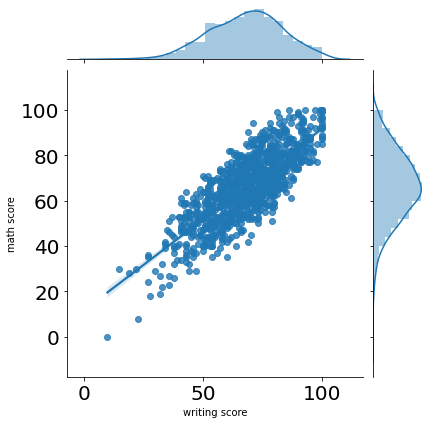

In [53]:
sns.jointplot("writing score", "math score", data=df, kind='reg');

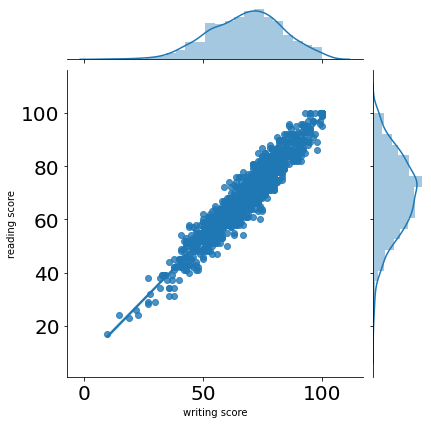

In [54]:
sns.jointplot("writing score", "reading score", data=df, kind='reg');

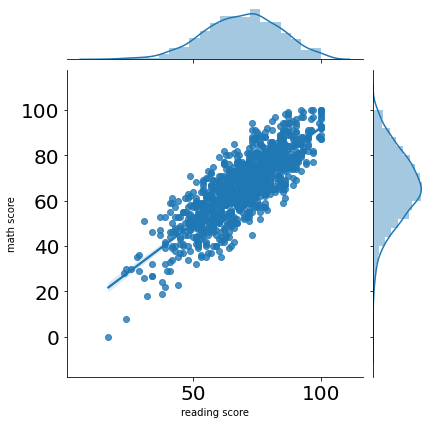

In [55]:
sns.jointplot("reading score", "math score", data=df, kind='reg');

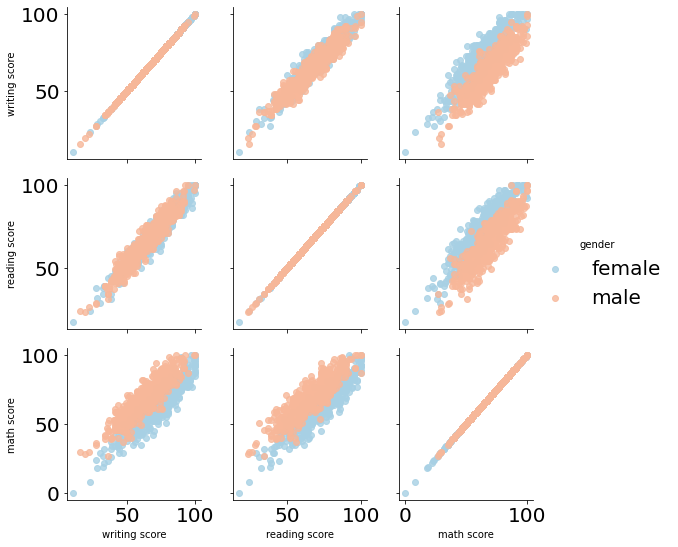

In [56]:
g = sns.PairGrid(df, vars=['writing score', 'reading score', 'math score'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();


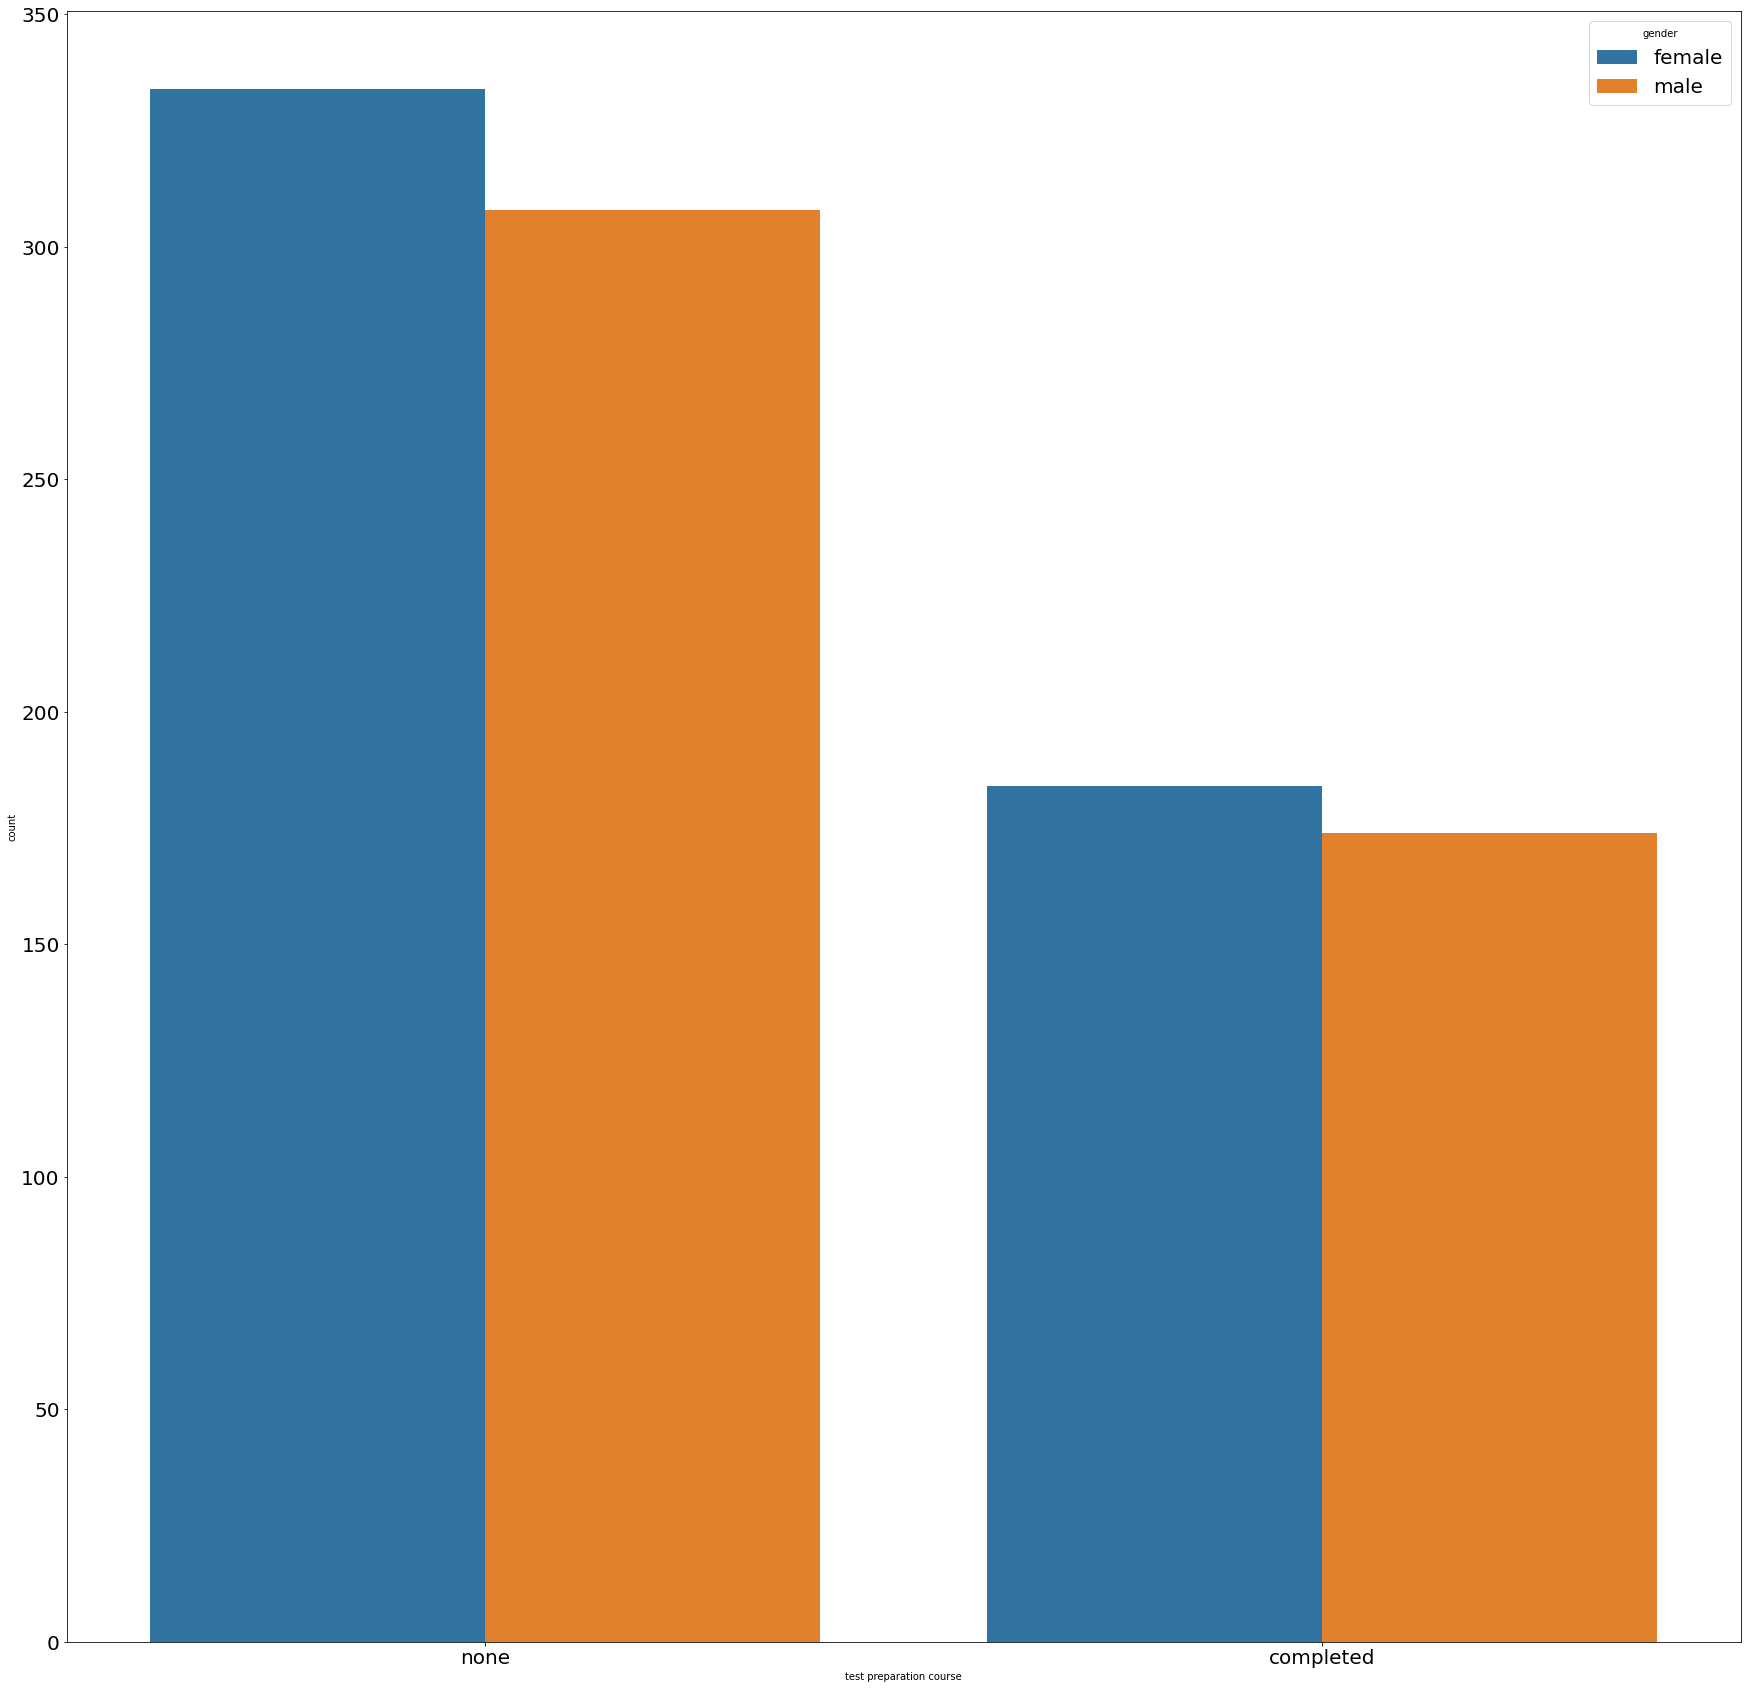

In [57]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='gender',data=df)
plt.show()

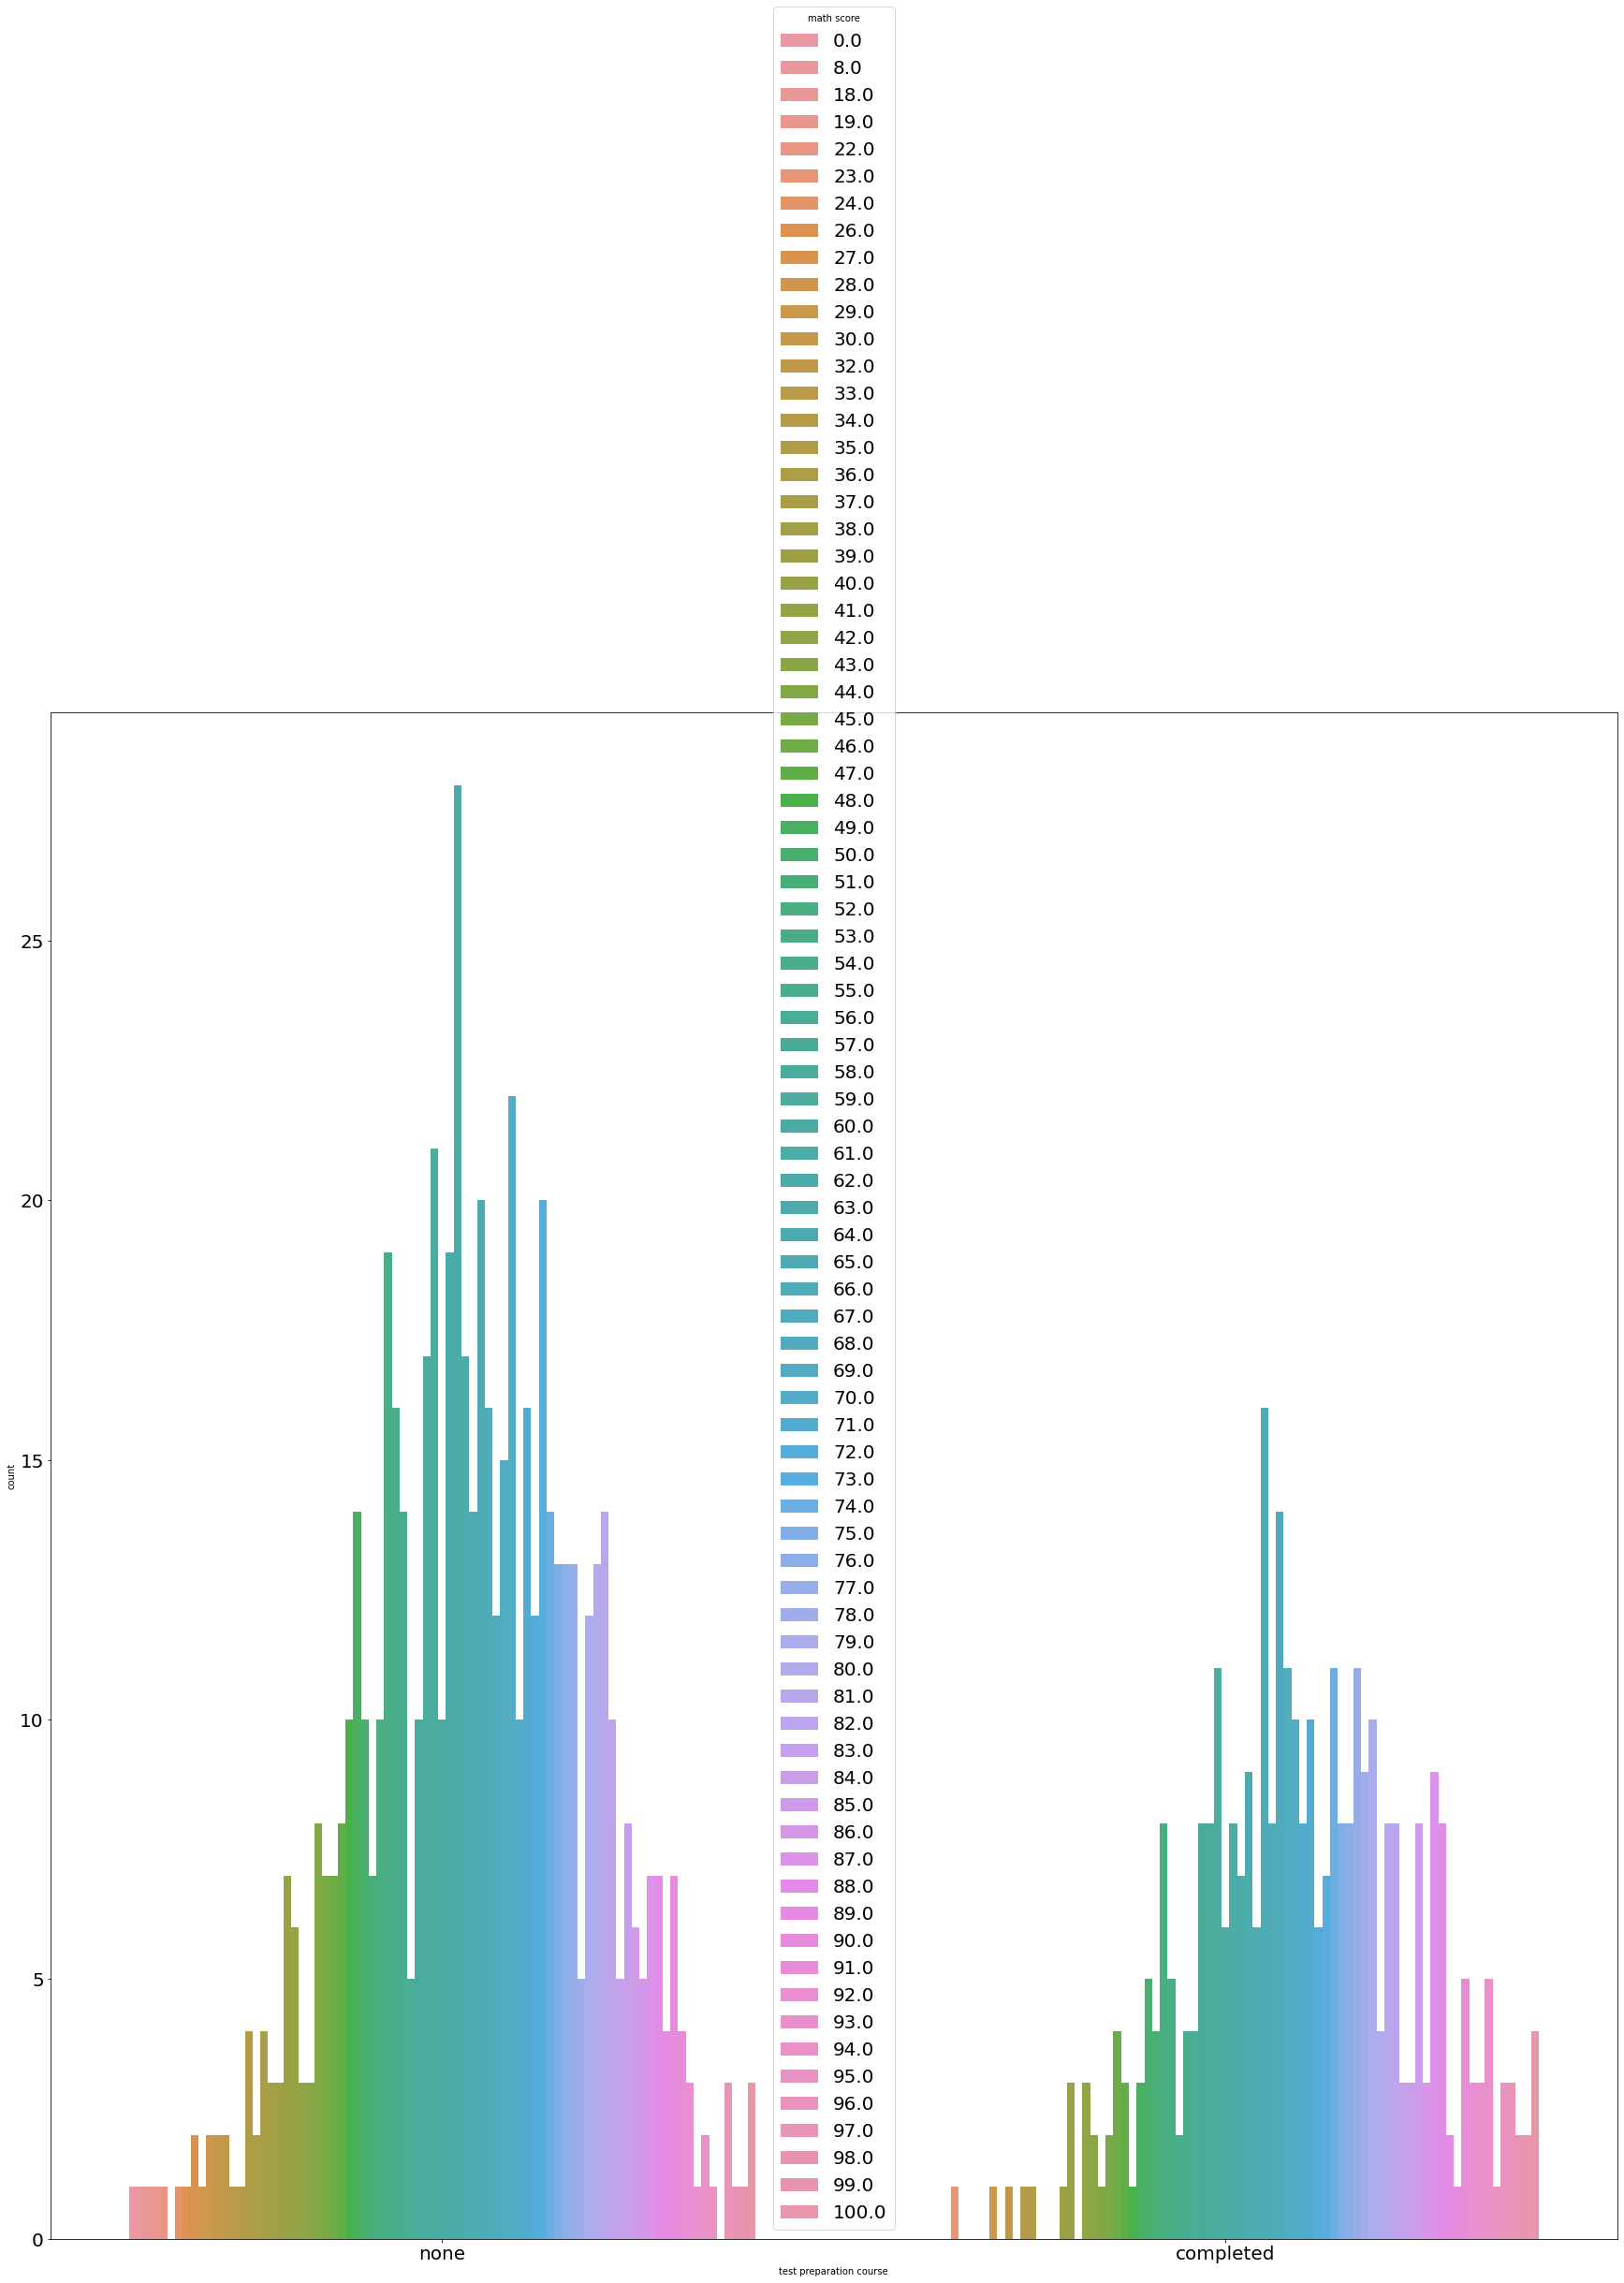

In [58]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='math score',data=df)
plt.show()

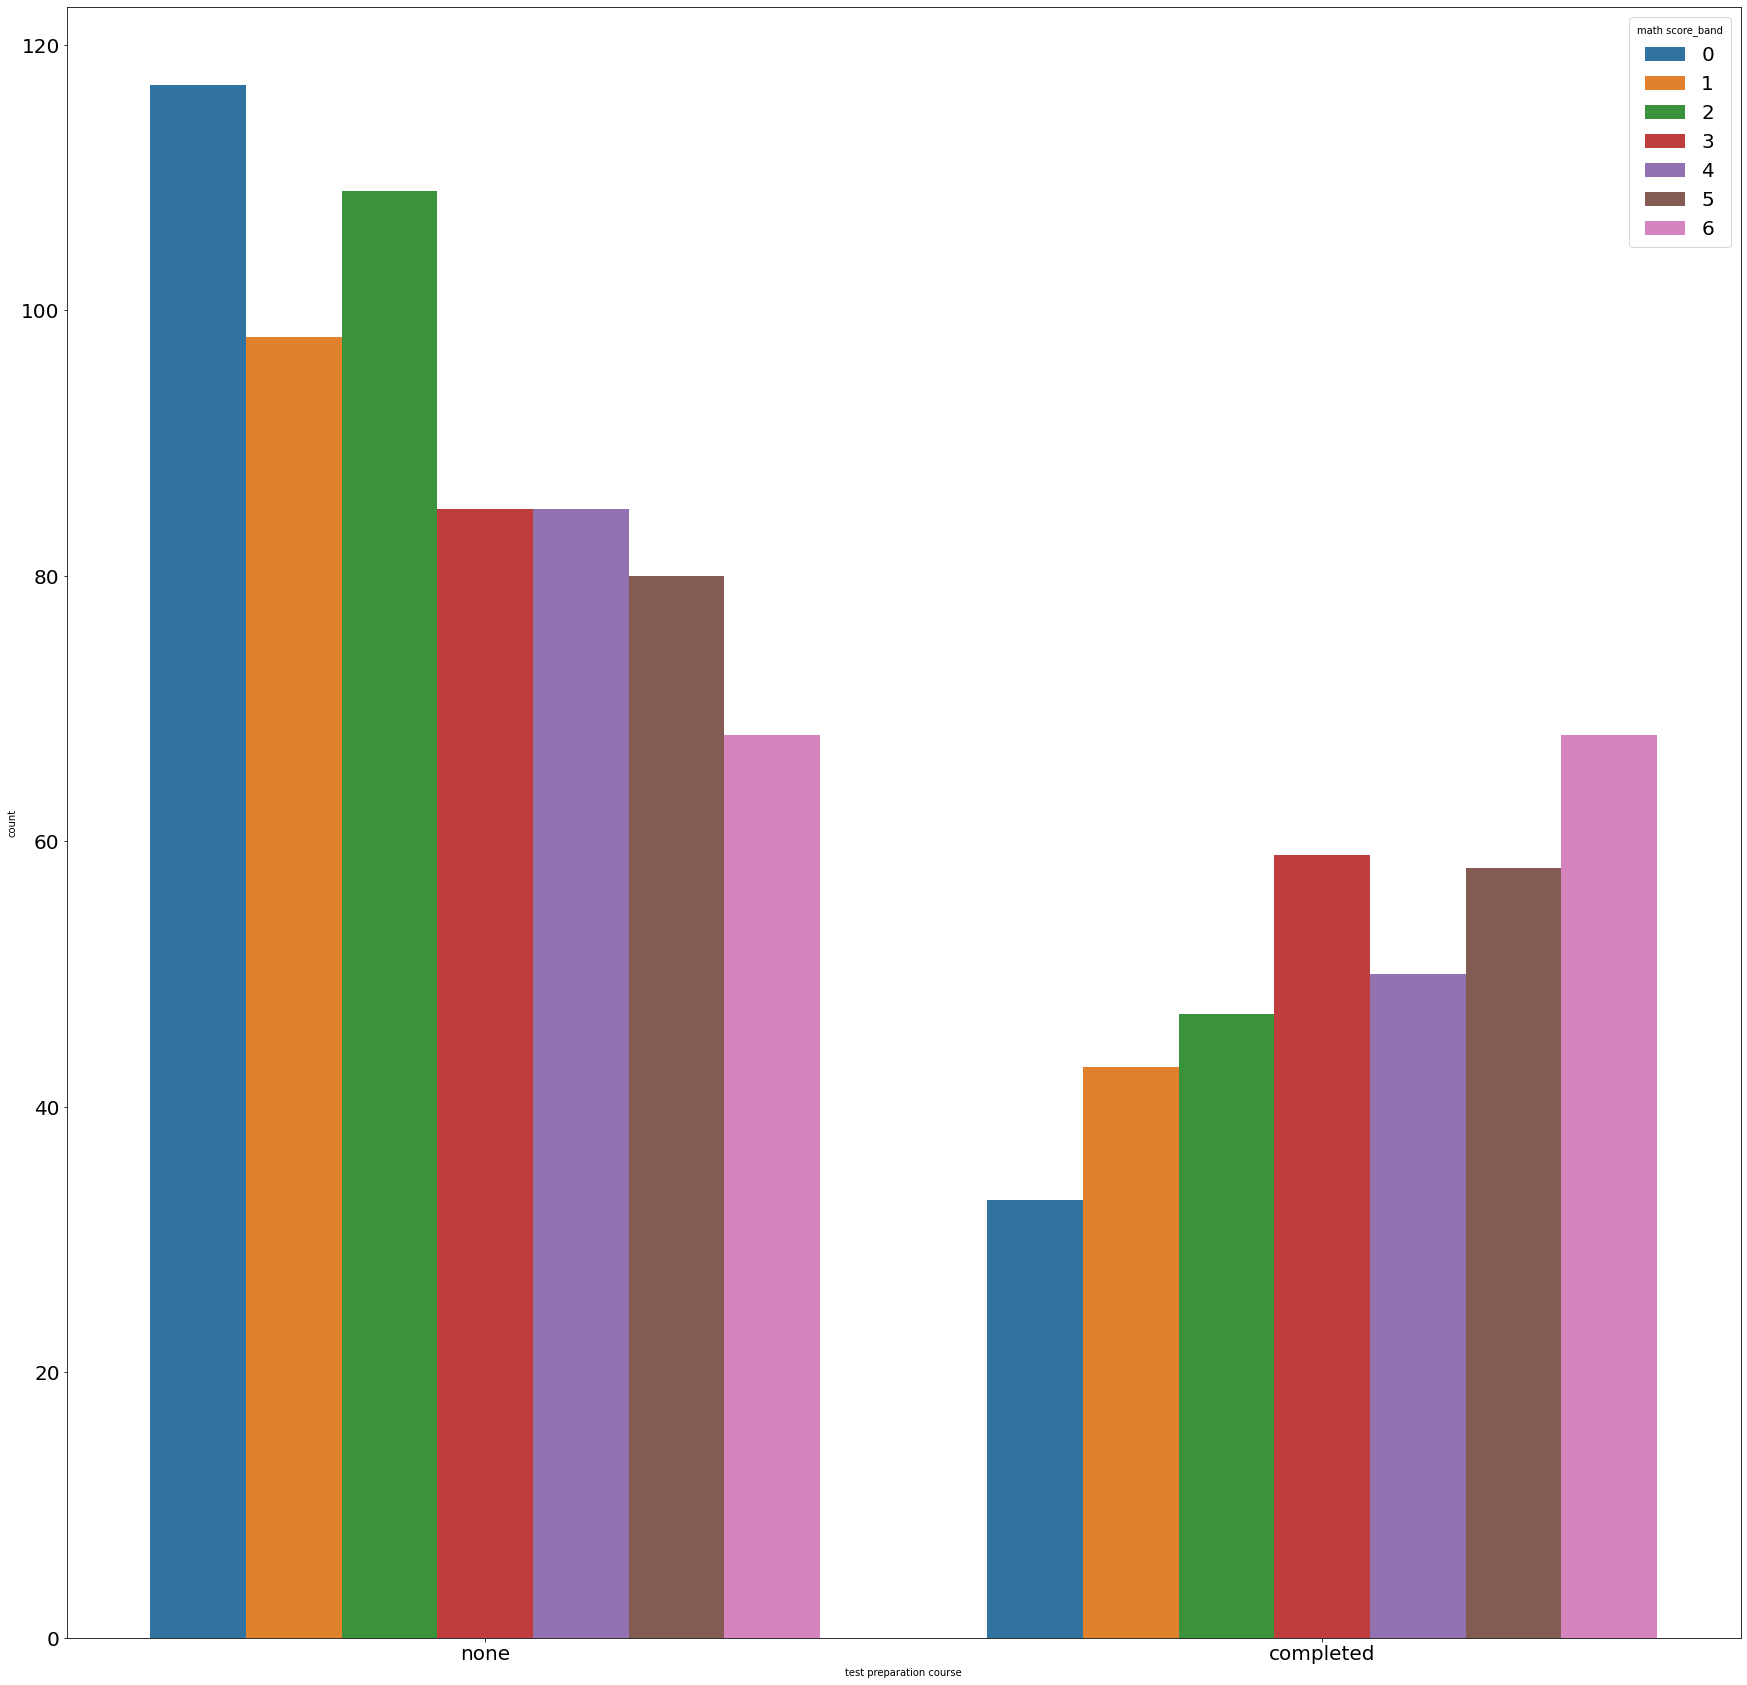

In [59]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='math score_band',data=df)
plt.show()

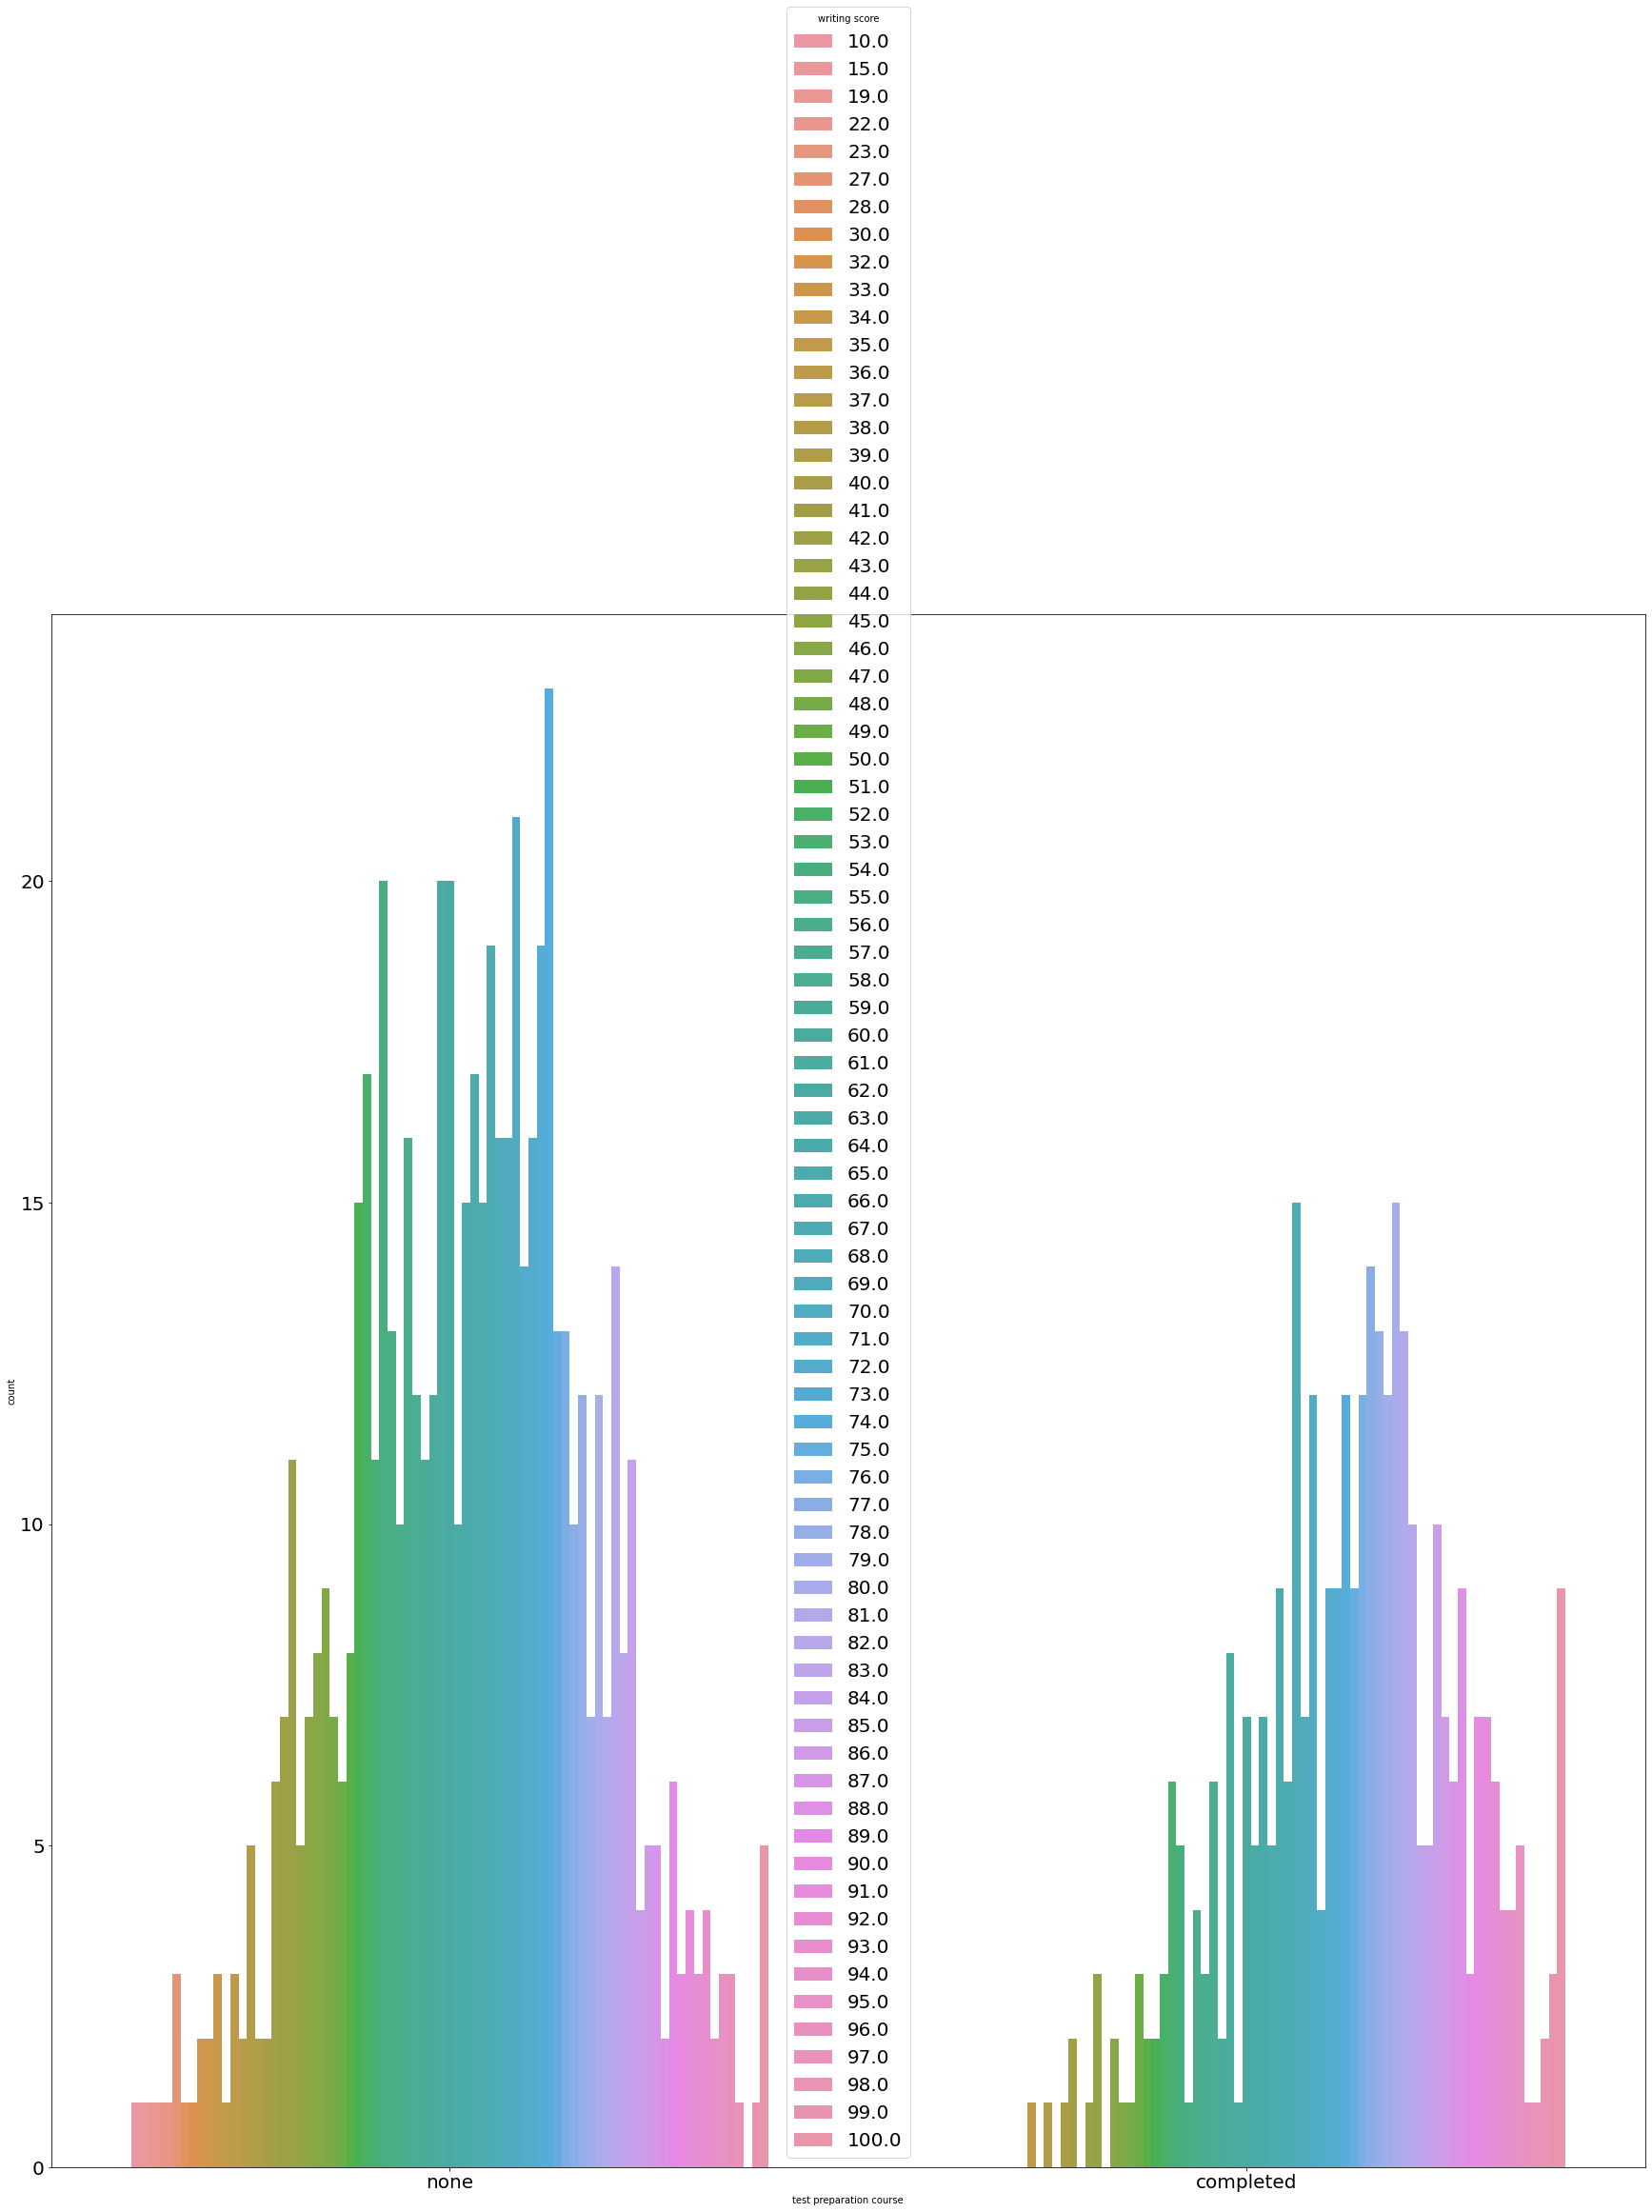

In [60]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='writing score',data=df)
plt.show()

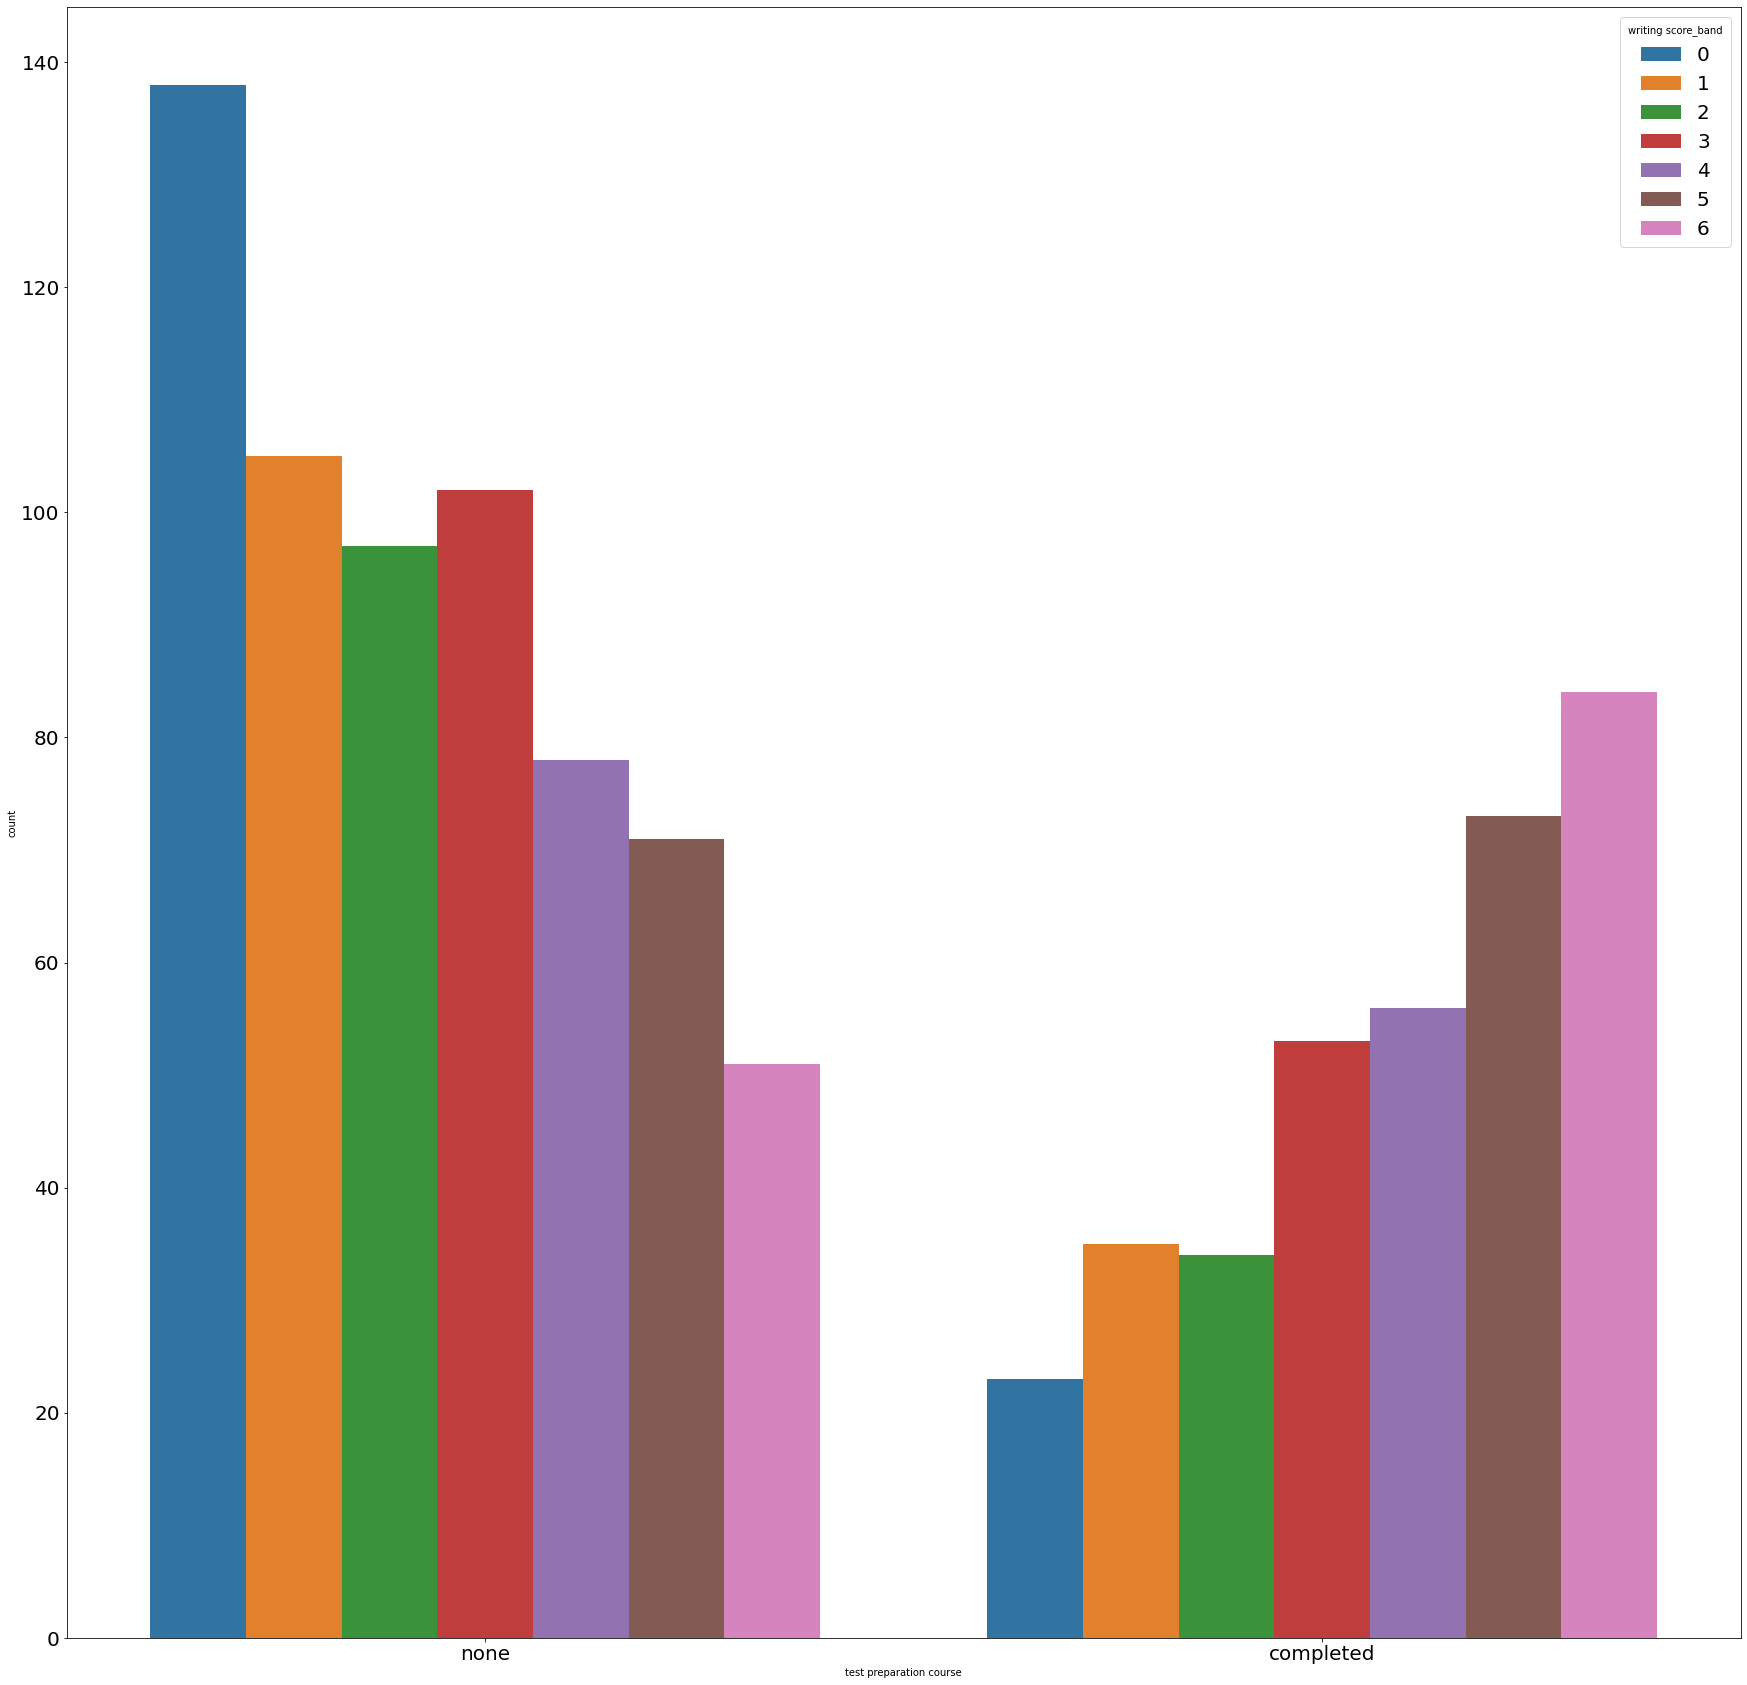

In [61]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='writing score_band',data=df)
plt.show()

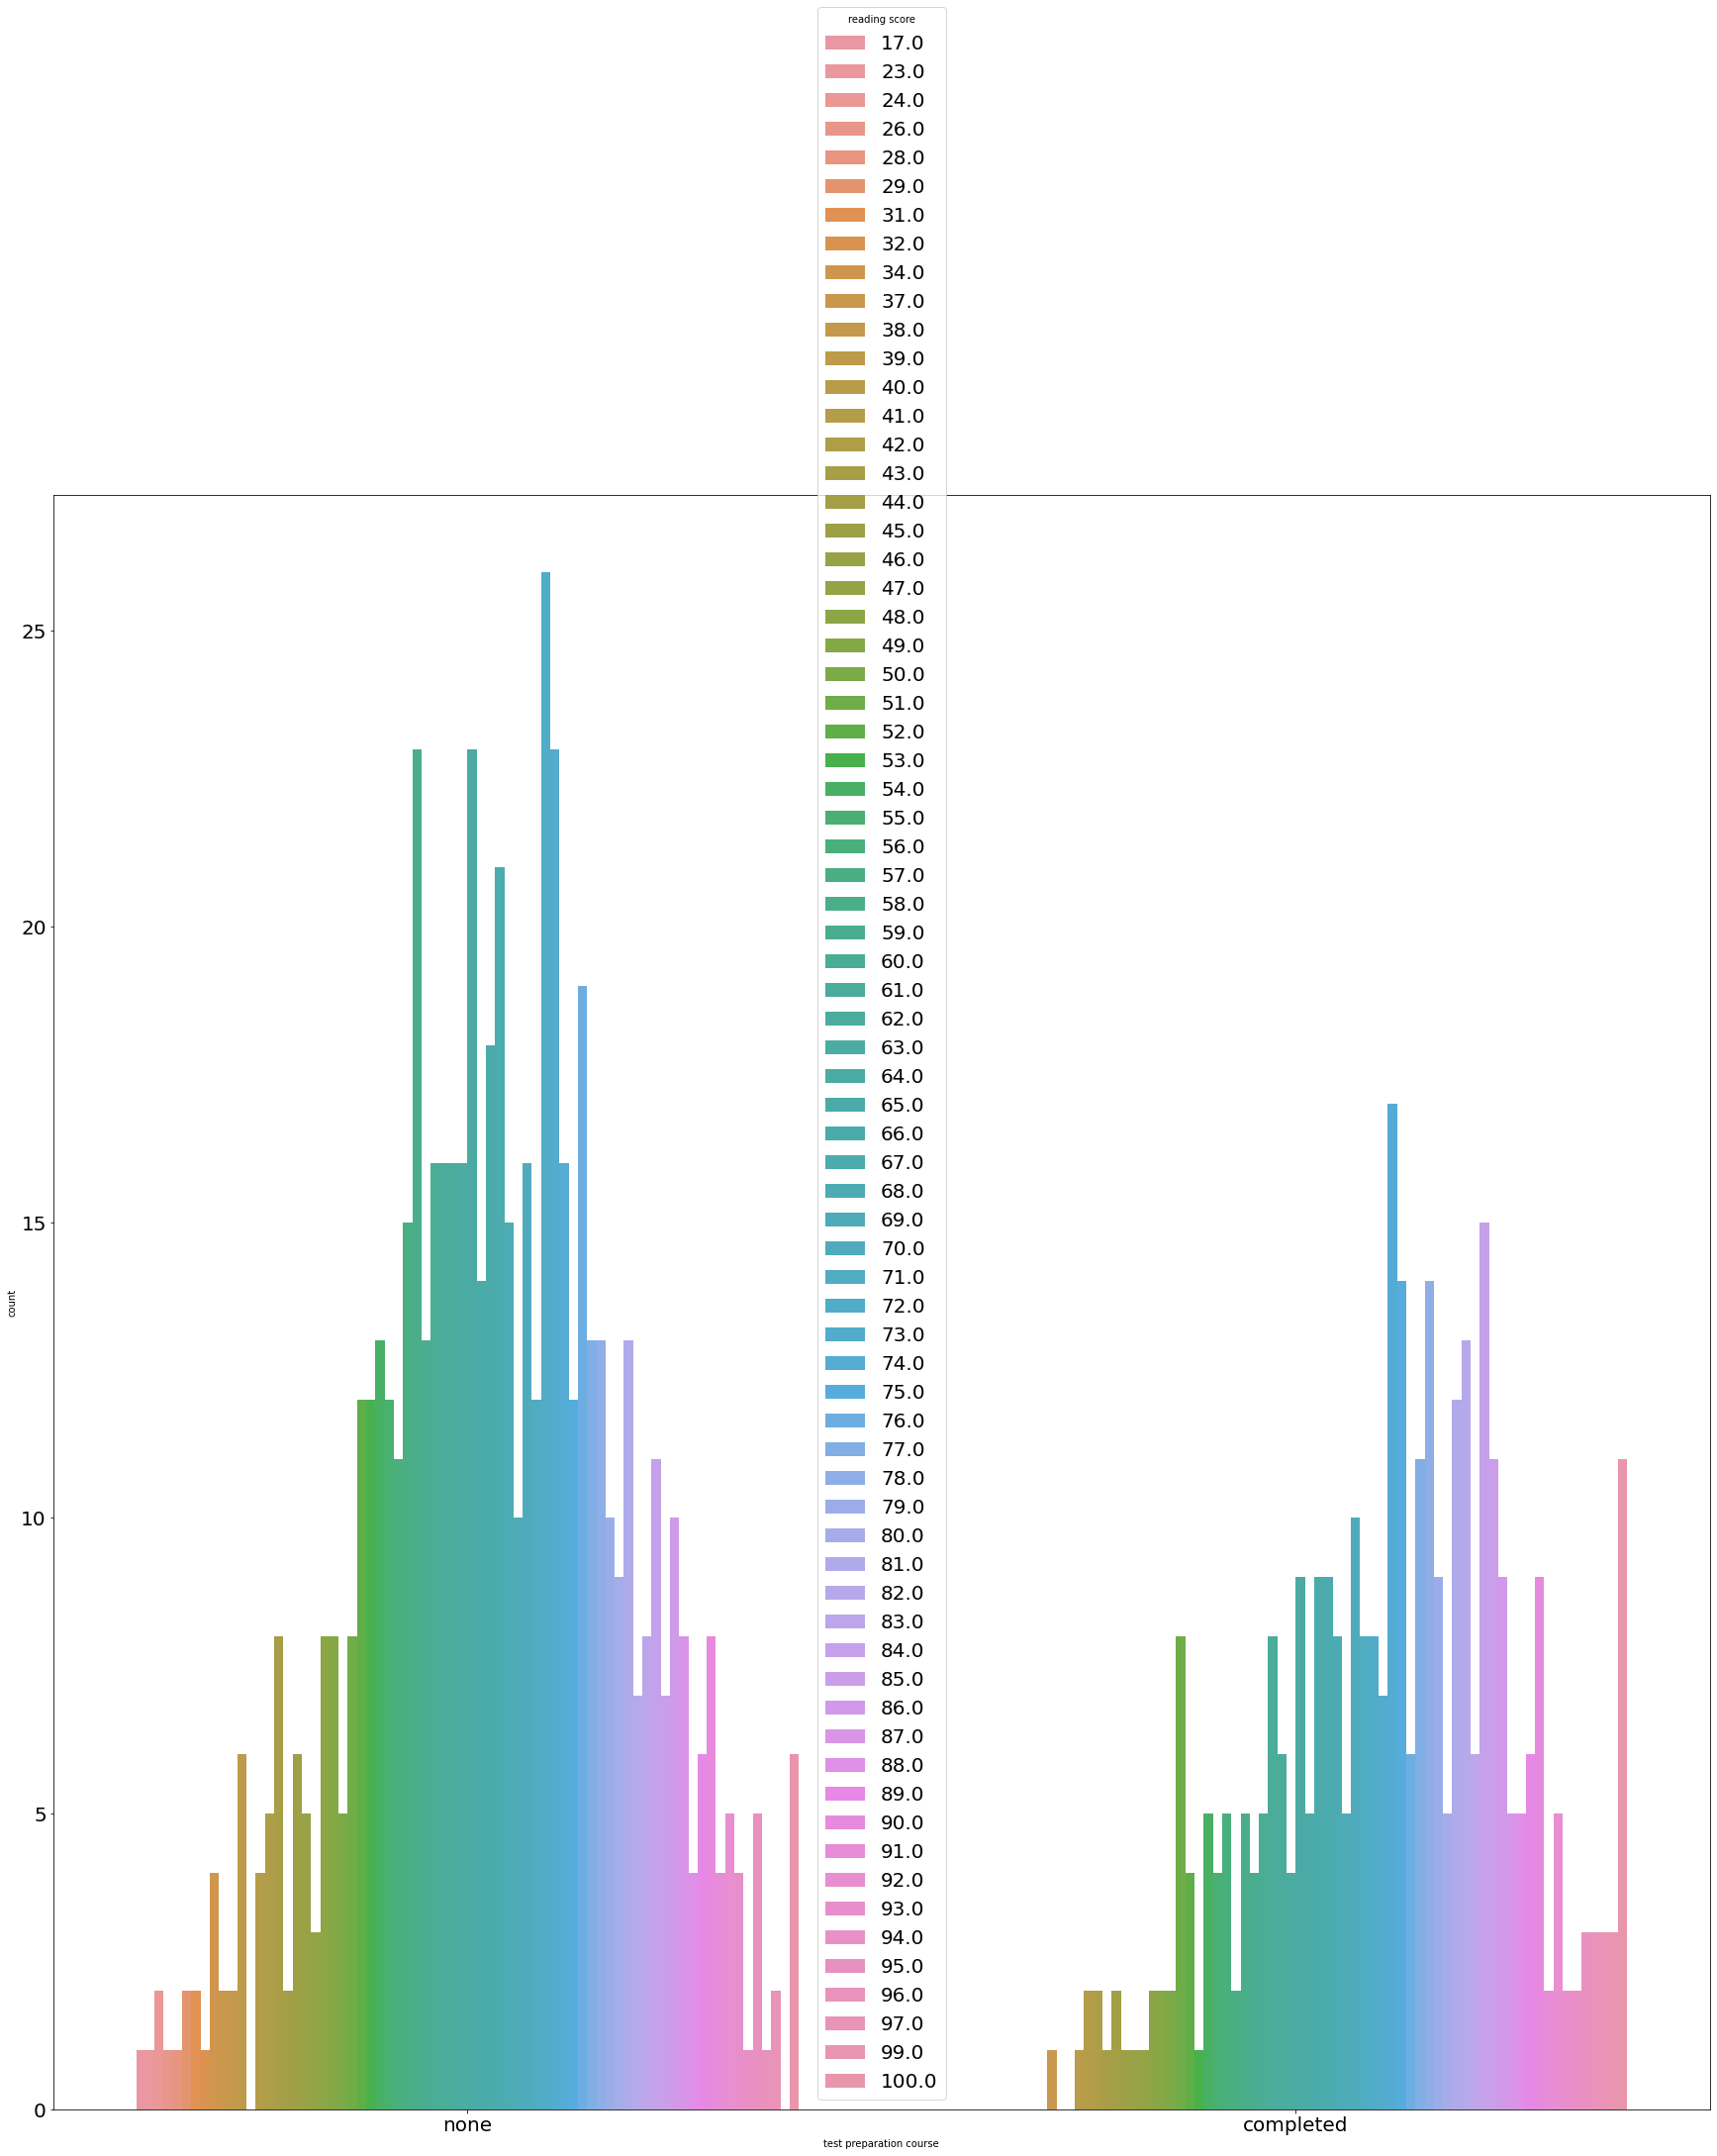

In [62]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='reading score',data=df)
plt.show()

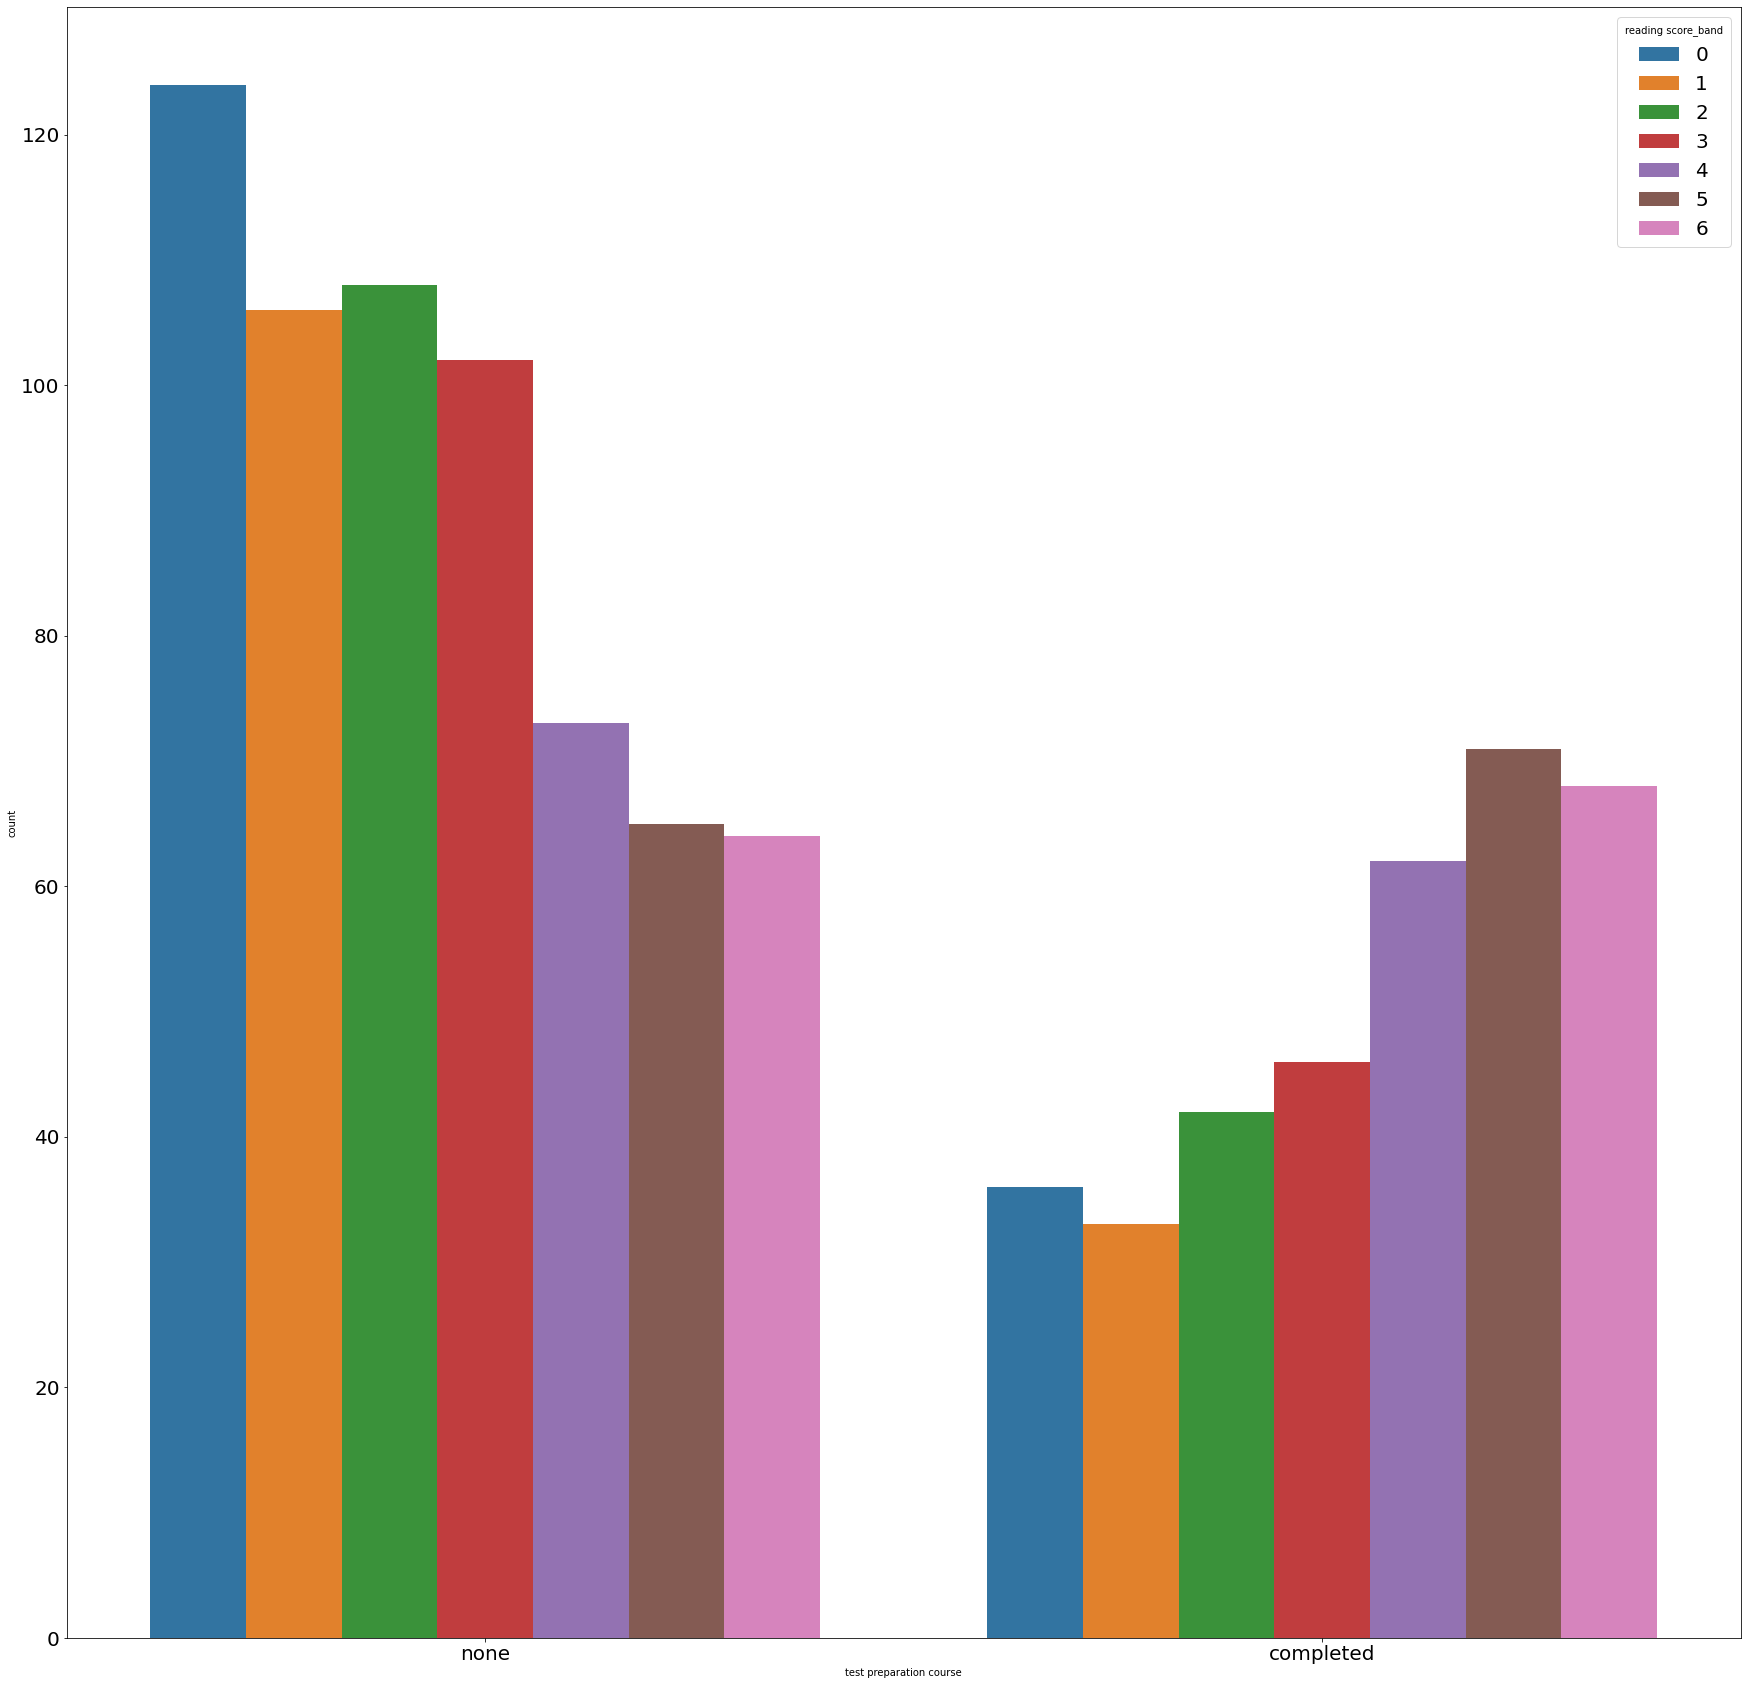

In [63]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['test preparation course'],hue='reading score_band',data=df)
plt.show()